## Bitcoin network analysis based on machine learning techniques
Authors:
- Anna Urban
- Dominik Gołębiowski
- Przemysław Herian
- Jan Gąsienica-Józkowy

### Project description 
The goal of the our project was to check and compare various methods that would be to predict bitcoin: *Market Price USD*, *Hash rate* and *Blockchain Size*, for 30 days ahead or for 3 years ahead.
We tested four different approaches to this problem:
- The first was to predict the current *Market Price USD*, *Hash rate* and *Blockchain Size* based on other current parameters such as: *Bitcoin Supply*, *Daily Number of Transactions*, *Estimated Transaction Volume*, *Unique Bitcoin Addresses Used*, *Mining difficulty*, *Miners Revenue*, *Cost Per Transaction*, *Total Transaction Fees USD*, *Average Block Size*, *Number of Transaction per Block*, and *Exchange Trade Volume*.
- The second was to predict the current *Market Price USD*, *Hash rate* and *Blockchain Size* based only on historical data of these and other parameters.
- The third was to predict the current *Market Price USD*, *Hash rate* and *Blockchain Size* based only on historical data of these and other parameters, but using an algorithm similar to a moving average.
- The last approach was to predict the price of bitcoin based only on its historical valuation.


### Data download
The data used in this project comes from quandl.com Blockchain dataset. The dataset contains data with daily intervals about The dataset is publicly avaiable on following website:

https://www.quandl.com/data/BCHAIN-Blockchain?fbclid=IwAR27ie_3WGDMChTB94F4T5NdL4onUYziIZGd72a8ABGJLB-zXKWD_zg10OU

In [1]:
!pip install quandl

In [98]:
import quandl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from keras.models import Sequential
# from keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
#!pip install pmdarima
#from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

In [3]:
# How bitcoin works: https://www.youtube.com/watch?v=bBC-nXj3Ng4
quandl.ApiConfig.api_key = 'T3ox-1VP3bnyZ6h1dFpb'

In [4]:
# Market Price USD - Average USD market price across major bitcoin exchanges.
btc_market_price = quandl.get("BCHAIN/MKPRU")

In [5]:
# Bitcoin Market Capitalization - The total USD value of bitcoin supply in circulation, as calculated by the daily average market price across major exchanges.
btc_market_cap = quandl.get("BCHAIN/MKTCP")

In [6]:
# Total Bitcoins - The total number of bitcoins that have already been mined; in other words, the current supply of bitcoins on the network.
btc_supply = quandl.get("BCHAIN/TOTBC")

In [7]:
# Blockchain Size - The total size of all block headers and transactions. Not including database indexes.
btc_blockchain_size = quandl.get("BCHAIN/BLCHS")

In [8]:
# Bitcoin Number of Transactions - The number of daily confirmed Bitcoin transactions.
btc_transactions_number = quandl.get("BCHAIN/NTRAN")

In [9]:
# Bitcoin Estimated Transaction Volume - The total estimated value of transactions on the Bitcoin blockchain (does not include coins returned to sender as change).
btc_transaction_volume = quandl.get("BCHAIN/ETRAV")

In [10]:
# Bitcoin Number of Unique Bitcoin Addresses Used - The total number of unique addresses used on the Bitcoin blockchain.
btc_addresses_used = quandl.get("BCHAIN/NADDU")

In [11]:
# Hash rate - Number of combinations guesses per second 
# https://www.youtube.com/watch?v=GgaXmhTC_C0
btc_hash_rate = quandl.get("BCHAIN/HRATE")

In [12]:
# Mining difficulty - A relative measure of how difficult it is to find a new block.
# https://www.youtube.com/watch?v=o1gOyhU6XEw
btc_mining_difficulty = quandl.get("BCHAIN/DIFF")

In [13]:
# Miners Revenue - Total value of coinbase block rewards and transaction fees paid to miners.
# https://www.youtube.com/watch?v=o1gOyhU6XEw
btc_miners_revenue = quandl.get("BCHAIN/MIREV")

In [14]:
# Bitcoin Cost Per Transaction - A chart showing miners revenue divided by the number of transactions.
btc_cost_per_transaction = quandl.get("BCHAIN/CPTRA")

In [15]:
# Bitcoin Total Transaction Fees USD - The total value of all transaction fees paid to miners (not including the coinbase value of block rewards).
btc_transaction_fees = quandl.get("BCHAIN/TRFUS")

In [16]:
# Bitcoin Average Block Size - The average block size in MB.
btc_avg_block_size = quandl.get("BCHAIN/AVBLS")

In [17]:
# Bitcoin Number of Transaction per Block - The average number of transactions per block.
btc_transactions_per_block = quandl.get("BCHAIN/NTRBL")

In [18]:
# Bitcoin Exchange Trade Volume - The total USD value of trading volume on major bitcoin exchanges
btc_transactions_per_block = quandl.get("BCHAIN/NTRBL")

In [19]:
print(btc_market_price.values[:,0].shape)
print(btc_market_cap.values[:,0].shape)
print(btc_supply.values[:,0].shape)
print(btc_blockchain_size.values[:,0].shape)
print(btc_transactions_number.values[:,0].shape)
print(btc_transaction_volume.values[:,0].shape)
print(btc_addresses_used.values[:,0].shape)
print(btc_hash_rate.values[:,0].shape)
print(btc_mining_difficulty.values[:,0].shape)
print(btc_miners_revenue.values[:,0].shape)
print(btc_cost_per_transaction.values[:,0].shape)
print(btc_addresses_used.values[:,0].shape)
print(btc_transaction_fees.values[:,0].shape)
print(btc_mining_difficulty.values[:,0].shape)
print(btc_avg_block_size.values[:,0].shape)
print(btc_transactions_per_block.values[:,0].shape)
print(btc_transactions_per_block.values[:,0].shape)

(4548,)
(4547,)
(4547,)
(4547,)
(4547,)
(4546,)
(4547,)
(4546,)
(4547,)
(4547,)
(4547,)
(4547,)
(4547,)
(4547,)
(4547,)
(4547,)
(4547,)


In [20]:
btc_data = pd.DataFrame(
    {
        "Market Price USD": btc_market_price.values[:-2,0],
        "Bitcoin Supply": btc_supply.values[:-1,0],
        "Blockchain Size": btc_blockchain_size.values[:-1,0],
        "Daily Number of Transactions": btc_transactions_number.values[:-1,0],
        "Estimated Transaction Volume": btc_transaction_volume.values[:,0],
        "Unique Bitcoin Addresses Used": btc_addresses_used.values[:-1,0],
        "Hash rate": btc_hash_rate.values[:,0],
        "Mining difficulty": btc_mining_difficulty.values[:-1,0],
        "Miners Revenue": btc_miners_revenue.values[:-1,0],
        "Cost Per Transaction": btc_cost_per_transaction.values[:-1,0],
        "Total Transaction Fees USD": btc_transaction_fees.values[:-1,0],
        "Average Block Size": btc_avg_block_size.values[:-1,0],
        "Number of Transaction per Block": btc_transactions_per_block.values[:-1,0],
        "Exchange Trade Volume": btc_transactions_per_block.values[:-1,0],
    },
    index=list(btc_market_cap.index[:-1])
)

In [21]:
btc_data

,Market Price USD,Bitcoin Supply,Blockchain Size,Daily Number of Transactions,Estimated Transaction Volume,Unique Bitcoin Addresses Used,Hash rate,Mining difficulty,Miners Revenue,Cost Per Transaction,Total Transaction Fees USD,Average Block Size,Number of Transaction per Block,Exchange Trade Volume
2009-01-02,0.00,50.00,0.000000,1.0,0.000000,1.0,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000272,1.000000,1.000000
2009-01-03,0.00,50.00,0.000000,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,1.000000
2009-01-04,0.00,50.00,0.000000,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,1.000000
2009-01-05,0.00,50.00,0.000000,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,1.000000
2009-01-06,0.00,50.00,0.000000,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-09,33450.19,18731031.25,349477.103190,210911.0,116051.363365,581779.0,1.234620e+08,2.104773e+13,2.908202e+07,134.170029,1.210337e+06,1.067569,1673.896825,1673.896825
2021-06-10,37338.36,18731862.50,349611.985192,252983.0,125318.068673,679752.0,1.098603e+08,2.104773e+13,2.899097e+07,114.596509,1.715939e+06,1.311452,2143.923729,2143.923729
2021-06-11,36704.57,18732518.75,349766.420460,216502.0,94723.611050,616007.0,1.381101e+08,2.104773e+13,2.575379e+07,118.954072,1.505579e+06,1.401894,2061.923810,2061.923810
2021-06-12,37313.18,18733400.00,349913.530160,222774.0,59967.976659,584529.0,1.367245e+08,2.104773e+13,3.118978e+07,139.888315,1.278938e+06,1.489760,1687.681818,1687.681818


In [22]:
btc_data.describe()

,Market Price USD,Bitcoin Supply,Blockchain Size,Daily Number of Transactions,Estimated Transaction Volume,Unique Bitcoin Addresses Used,Hash rate,Mining difficulty,Miners Revenue,Cost Per Transaction,Total Transaction Fees USD,Average Block Size,Number of Transaction per Block,Exchange Trade Volume
count,4546.000000,4.546000e+03,4546.000000,4546.000000,4.546000e+03,4.546000e+03,4.546000e+03,4.546000e+03,4.546000e+03,4546.000000,4.546000e+03,4546.000000,4546.000000,4546.000000
mean,4227.130831,1.226071e+07,88756.001710,142809.813462,1.716763e+05,2.762023e+05,2.418165e+07,3.334047e+12,6.391288e+06,27.255028,4.858816e+05,0.515871,961.917973,961.917973
std,9431.154544,5.659068e+06,106121.719274,127721.341869,2.174640e+05,2.562189e+05,4.452188e+07,6.167873e+12,1.102177e+07,37.841080,1.562819e+06,0.471192,871.765514,871.765514
min,0.000000,5.000000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,1.000000
25%,6.624742,8.329388e+06,793.500000,8018.500000,7.649259e+04,1.698575e+04,1.161898e+01,1.591075e+06,4.813726e+04,4.156888,8.126035e+01,0.023473,53.337001,53.337001
50%,416.280000,1.397984e+07,31586.000000,100039.500000,1.470641e+05,2.121520e+05,3.363049e+05,4.742755e+10,1.383753e+06,9.917603,7.650435e+03,0.376607,692.732000,692.732000
75%,6069.705000,1.701472e+07,166827.779920,265693.500000,2.299872e+05,4.942010e+05,3.045168e+07,4.022059e+12,9.660944e+06,39.367336,2.069975e+05,0.966305,1825.958333,1825.958333
max,63554.440000,1.873406e+07,350110.221082,490644.000000,5.313161e+06,1.072861e+06,1.985140e+08,2.504649e+13,8.017224e+07,300.310549,2.128565e+07,1.499183,2762.540984,2762.540984


<AxesSubplot:>

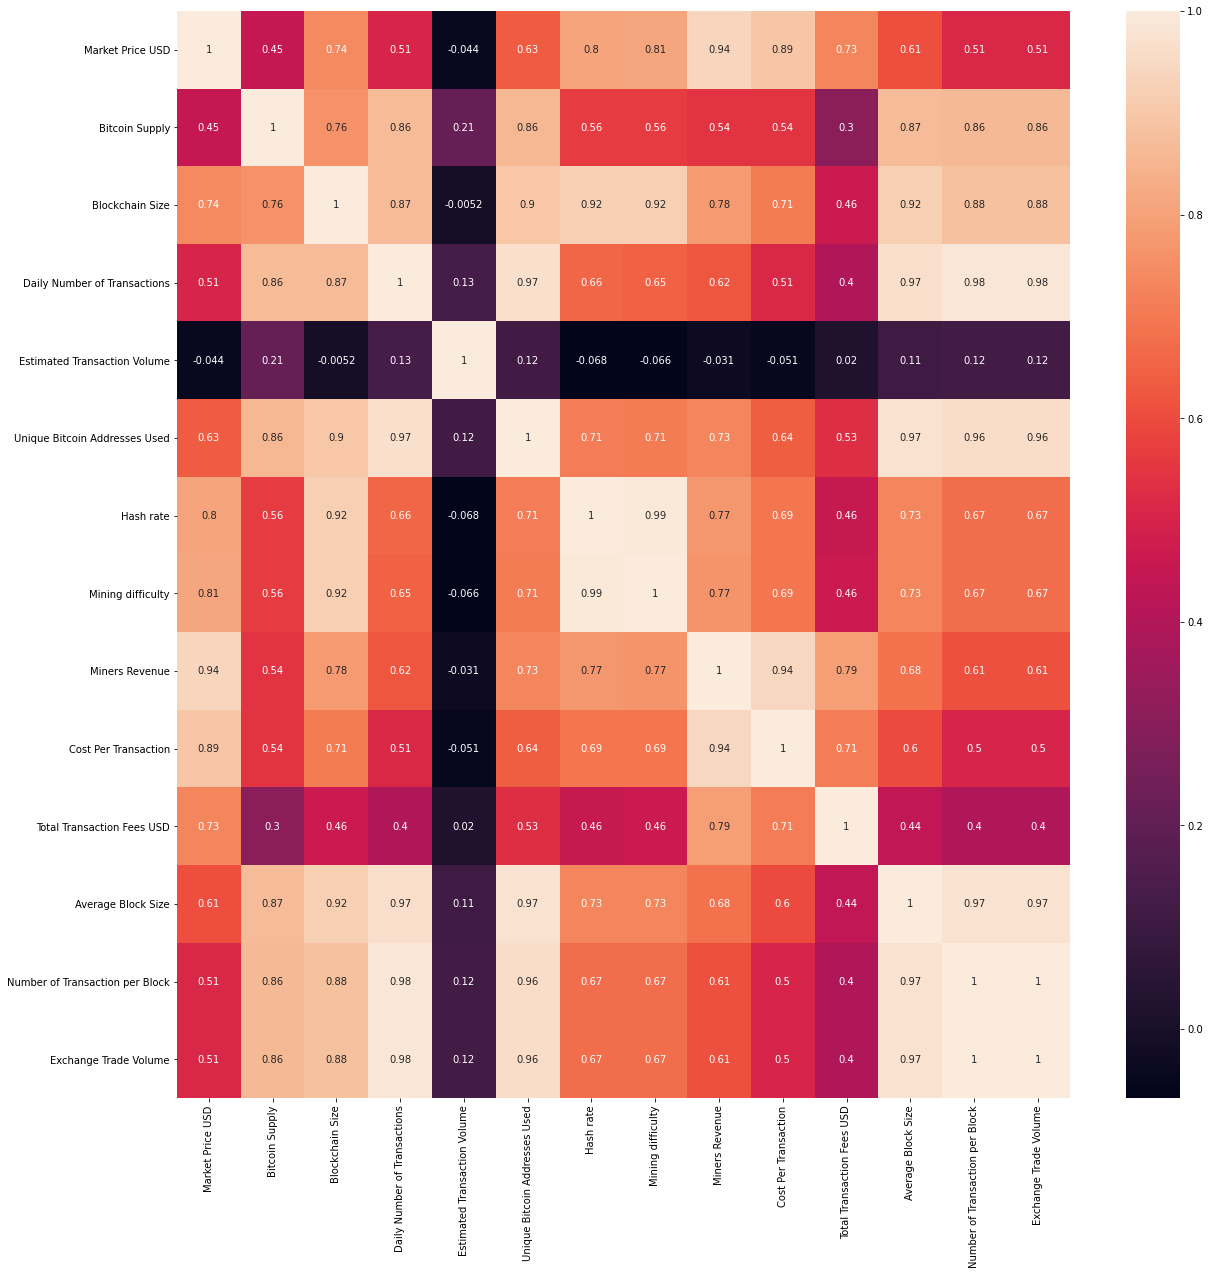

In [23]:
corr = btc_data.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr, annot = True)

## Data preparation

We will split data into Train and Test dataset. The test dataset will be last 30 days in order to see how well our model would predict recent values.

The goal of this method would be to predict Market Price USD, Hash rate and Blockchain Size based on other parameters.

Add bias and set index to dates

In [24]:
df = pd.concat([pd.Series(1, index=btc_data.index, name='00'), btc_data], axis=1)
df.head()

,00,Market Price USD,Bitcoin Supply,Blockchain Size,Daily Number of Transactions,Estimated Transaction Volume,Unique Bitcoin Addresses Used,Hash rate,Mining difficulty,Miners Revenue,Cost Per Transaction,Total Transaction Fees USD,Average Block Size,Number of Transaction per Block,Exchange Trade Volume
2009-01-02,1,0.0,50.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000272,1.0,1.0
2009-01-03,1,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0
2009-01-04,1,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0
2009-01-05,1,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0
2009-01-06,1,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0


In [25]:
columns = ["Market Price USD", "Hash rate", "Blockchain Size"]
X = df.drop(columns=columns)
marketprice = df["Market Price USD"]
hashrate = df["Hash rate"]
blockchainsize = df["Blockchain Size"]

Normalize the input variables

In [26]:
for column in X.columns:
    X[column] = X[column]/np.max(X[column])
X

,00,Bitcoin Supply,Daily Number of Transactions,Estimated Transaction Volume,Unique Bitcoin Addresses Used,Mining difficulty,Miners Revenue,Cost Per Transaction,Total Transaction Fees USD,Average Block Size,Number of Transaction per Block,Exchange Trade Volume
2009-01-02,1.0,0.000003,0.000002,0.000000,9.320872e-07,3.992576e-14,0.000000,0.000000,0.000000,0.000181,0.000362,0.000362
2009-01-03,1.0,0.000003,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000362,0.000362
2009-01-04,1.0,0.000003,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000362,0.000362
2009-01-05,1.0,0.000003,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000362,0.000362
2009-01-06,1.0,0.000003,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000362,0.000362
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-09,1.0,0.999838,0.429866,0.021842,5.422688e-01,8.403466e-01,0.362744,0.446771,0.056862,0.712101,0.605927,0.605927
2021-06-10,1.0,0.999883,0.515614,0.023586,6.335881e-01,8.403466e-01,0.361609,0.381593,0.080615,0.874778,0.776069,0.776069
2021-06-11,1.0,0.999918,0.441261,0.017828,5.741722e-01,8.403466e-01,0.321231,0.396104,0.070732,0.935105,0.746387,0.746387
2021-06-12,1.0,0.999965,0.454044,0.011287,5.448320e-01,8.403466e-01,0.389035,0.465812,0.060085,0.993714,0.610916,0.610916


Separate for training and test set the independent X values and the dependent y for 3 predictions: market price, hash rate, blockchain size. 

In [27]:
test_len = 30

train_X = X.iloc[:-test_len]
test_X = X.iloc[-test_len:]

train_marketprice = marketprice.iloc[:-test_len]
test_marketprice = marketprice.iloc[-test_len:]
train_hashrate = hashrate.iloc[:-test_len]
test_hashrate = hashrate.iloc[-test_len:]    
train_blockchainsize = blockchainsize.iloc[:-test_len]
test_blockchainsize = blockchainsize.iloc[-test_len:]    

In [28]:
test_len = 1095

train_X_3y = X.iloc[:-test_len]
test_X_3y = X.iloc[-test_len:]

train_marketprice_3y = marketprice.iloc[:-test_len]
test_marketprice_3y = marketprice.iloc[-test_len:]
train_hashrate_3y = hashrate.iloc[:-test_len]
test_hashrate_3y = hashrate.iloc[-test_len:]    
train_blockchainsize_3y = blockchainsize.iloc[:-test_len]
test_blockchainsize_3y = blockchainsize.iloc[-test_len:]    

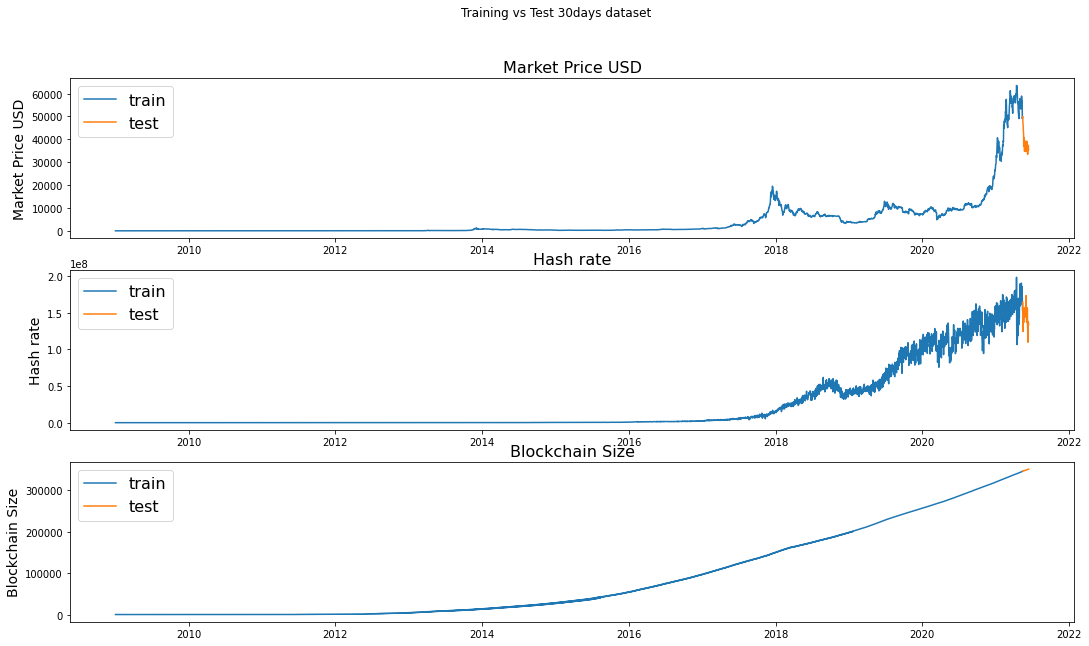

In [29]:
fig, ax = plt.subplots(3, figsize=(18, 10))
fig.suptitle('Training vs Test 30days dataset')

columns = ["Market Price USD", "Hash rate", "Blockchain Size"]
training_y = [train_marketprice, train_hashrate, train_blockchainsize]
test_y = [test_marketprice, test_hashrate, test_blockchainsize]

for idx, (column, train_y,test_y) in enumerate(zip(columns, training_y, test_y)):
    ax[idx].plot(train_y, label="train")
    ax[idx].plot(test_y, label="test")
    ax[idx].set_ylabel(column, fontsize=14)
    ax[idx].set_title(column, fontsize=16)
    ax[idx].legend(loc='best', fontsize=16)

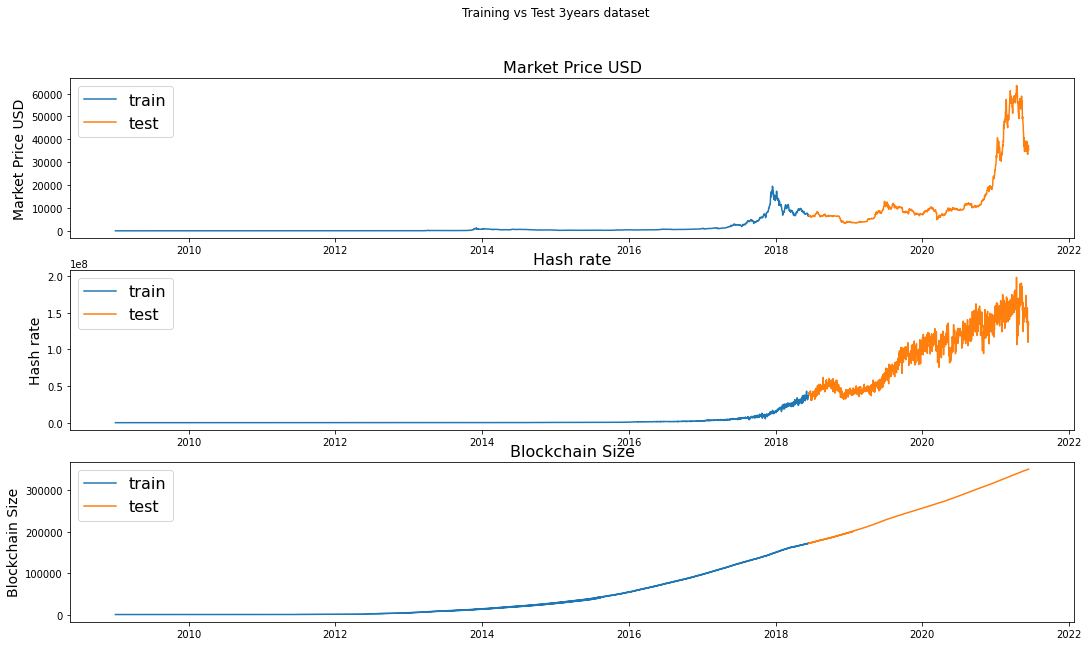

In [30]:
fig, ax = plt.subplots(3, figsize=(18, 10))
fig.suptitle('Training vs Test 3years dataset')

columns = ["Market Price USD", "Hash rate", "Blockchain Size"]
training_y = [train_marketprice_3y, train_hashrate_3y, train_blockchainsize_3y]
test_y = [test_marketprice_3y, test_hashrate_3y, test_blockchainsize_3y]

for idx, (column, train_y,test_y) in enumerate(zip(columns, training_y, test_y)):
    ax[idx].plot(train_y, label="train")
    ax[idx].plot(test_y, label="test")
    ax[idx].set_ylabel(column, fontsize=14)
    ax[idx].set_title(column, fontsize=16)
    ax[idx].legend(loc='best', fontsize=16)

# Multivariate Linear Regression
The goal of this method would be to predict *Market Price USD*, *Hash rate* and *Blockchain Size* based on other parameters.

[$x_{1}$, $x_{2}$...$x_{12}$] -> [$x_{price}$, $x_{hash}$, $x_{blockchain}$] 

Article: https://towardsdatascience.com/multivariate-linear-regression-in-python-step-by-step-128c2b127171




Initiate theta values

In [31]:
def initialize_theta():
    theta = np.array([0]*len(train_X.columns))
    return theta
    
theta = initialize_theta()
theta

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Define the hypothesis function

In [32]:
def hypothesis(theta, train_X):
    return theta*train_X

Define the cost function

In [33]:
def computeCost(train_X, train_y, theta):
    y1 = hypothesis(theta, train_X)
    y1 = np.sum(y1, axis=1)
    return sum(np.sqrt((y1-train_y)**2))/(2*47)

Write the function for the gradient descent. This function will take X, y, theta, learning rate (alpha), and epochs (iterations) as input. 

Target: Cost function reaches minimum.

In [34]:
def gradientDescent(train_X, train_y, theta, alpha, i):
    J = []  #cost function in each iterations
    k = 0
    while k < i:        
        y1 = hypothesis(theta, train_X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(train_X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-train_y)*train_X.iloc[:,c])/len(train_X))
        j = computeCost(train_X, train_y, theta)
        J.append(j)
        k += 1
    return J, j, theta

### Train & predict for Market Price USD
Use the gradient descent function to get the final cost, the list of cost in each iteration, and the optimized parameters theta.

Predict the output using the optimized theta and initialize back theta values for next prediction

In [35]:
J_marketprice, j_marketprice, theta_marketprice = gradientDescent(train_X, train_marketprice, theta, 0.05, 5000)
y_hat_marketprice = hypothesis(theta_marketprice, test_X)
y_hat_marketprice = np.sum(y_hat_marketprice, axis=1)
theta = initialize_theta()

In [36]:
J_marketprice_3y, j_marketprice_3y, theta_marketprice_3y = gradientDescent(train_X_3y, train_marketprice_3y, theta, 0.05, 5000)
y_hat_marketprice_3y = hypothesis(theta_marketprice_3y, test_X_3y)
y_hat_marketprice_3y = np.sum(y_hat_marketprice_3y, axis=1)
theta = initialize_theta()

### Train & predict for Hash Rate

In [37]:
J_hashrate, j_hashrate, theta_hashrate = gradientDescent(train_X, train_hashrate, theta, 0.05, 5000)
y_hat_hashrate = hypothesis(theta_hashrate, test_X)
y_hat_hashrate = np.sum(y_hat_hashrate, axis=1)
theta = initialize_theta()

In [38]:
J_hashrate_3y, j_hashrate_3y, theta_hashrate_3y = gradientDescent(train_X_3y, train_hashrate_3y, theta, 0.05, 5000)
y_hat_hashrate_3y = hypothesis(theta_hashrate_3y, test_X_3y)
y_hat_hashrate_3y = np.sum(y_hat_hashrate_3y, axis=1)
theta = initialize_theta()

### Train & predict for Blockchain Size

In [39]:
J_blockchainsize, j_blockchainsize, theta_blockchainsize = gradientDescent(train_X, train_blockchainsize, theta, 0.05, 5000)
y_hat_blockchainsize = hypothesis(theta_blockchainsize, test_X)
y_hat_blockchainsize = np.sum(y_hat_blockchainsize, axis=1)
theta = initialize_theta()

In [40]:
J_blockchainsize_3y, j_blockchainsize_3y, theta_blockchainsize_3y = gradientDescent(train_X_3y, train_blockchainsize_3y, theta, 0.05, 5000)
y_hat_blockchainsize_3y = hypothesis(theta_blockchainsize_3y, test_X_3y)
y_hat_blockchainsize_3y = np.sum(y_hat_blockchainsize_3y, axis=1)
theta = initialize_theta()

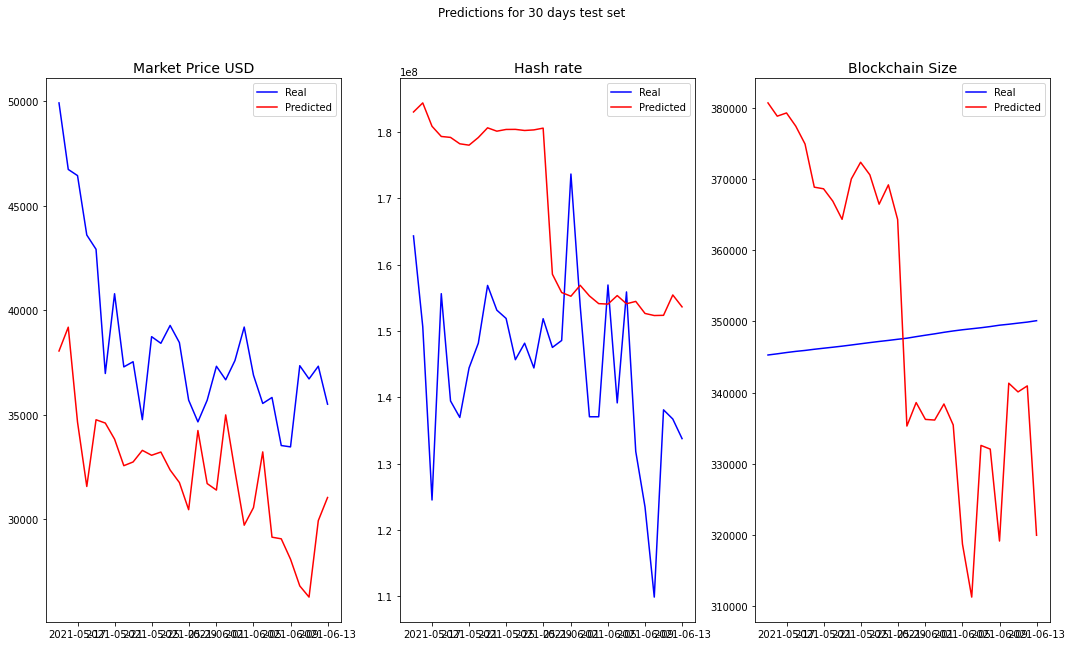

In [41]:
predicted_sets = [y_hat_marketprice, y_hat_hashrate, y_hat_blockchainsize]
test_sets = [test_marketprice, test_hashrate, test_blockchainsize]
column_names = ["Market Price USD", "Hash rate", "Blockchain Size"]

fig, ax = plt.subplots(1, 3, figsize=(18, 10))
fig.suptitle('Predictions for 30 days test set')

for idx, (column_name, predicted_set, test_set) in enumerate(zip(column_names, predicted_sets, test_sets)):
    ax[idx].plot(test_set, color='blue', label="Real")         
    ax[idx].plot(predicted_set, color='red', label="Predicted")
    ax[idx].set_title(column_name, fontsize=14)
    ax[idx].legend()

plt.show()

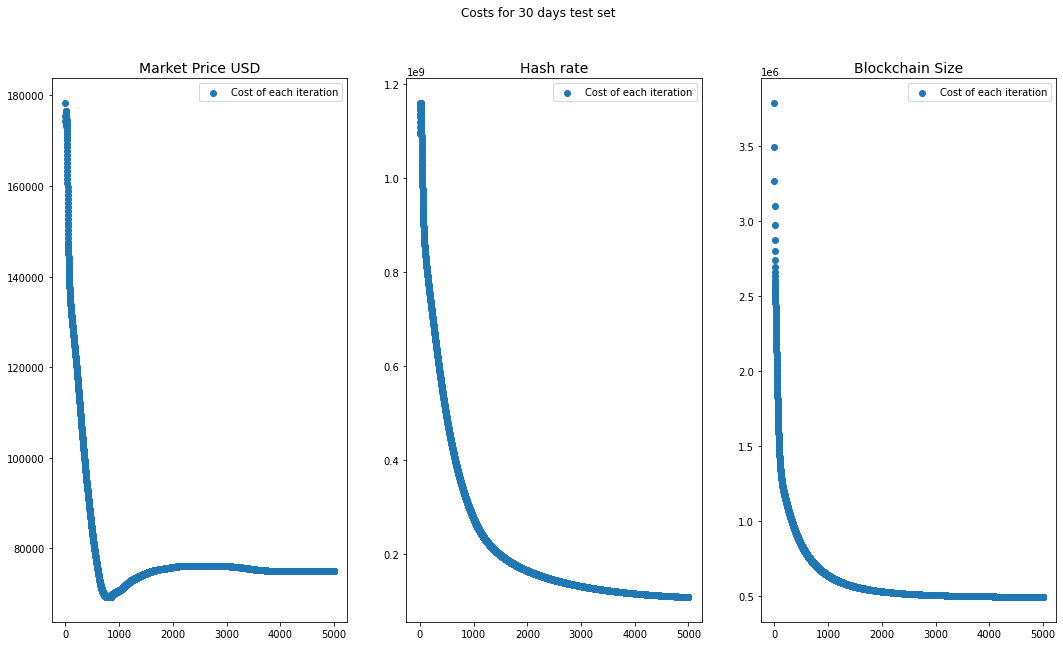

In [42]:
J = [J_marketprice, J_hashrate, J_blockchainsize]

fig, ax = plt.subplots(1, 3, figsize=(18, 10))
fig.suptitle('Costs for 30 days test set')

for idx, j, column_name in zip([0, 1, 2], J, column_names):
    ax[idx].scatter(x=list(range(0, 5000)), y=j, label="Cost of each iteration")
    ax[idx].set_title(column_name, fontsize=14)
    ax[idx].legend()

plt.show()

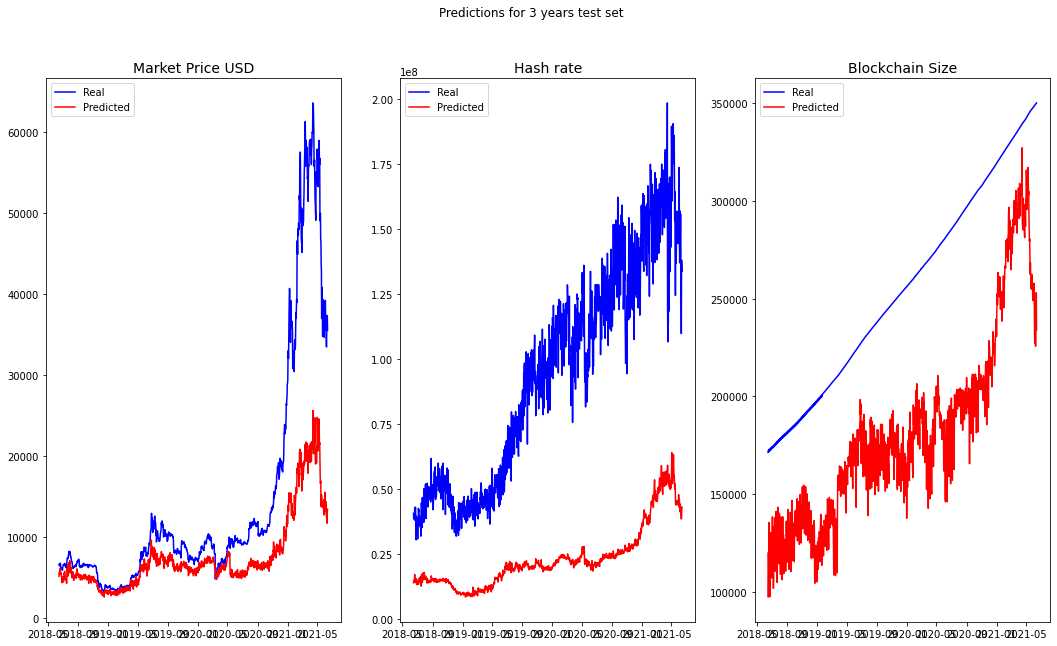

In [43]:
predicted_sets_3y = [y_hat_marketprice_3y, y_hat_hashrate_3y, y_hat_blockchainsize_3y]
test_sets_3y = [test_marketprice_3y, test_hashrate_3y, test_blockchainsize_3y]
column_names = ["Market Price USD", "Hash rate", "Blockchain Size"]

fig, ax = plt.subplots(1, 3, figsize=(18, 10))
fig.suptitle('Predictions for 3 years test set')

for idx, (column_name, predicted_set, test_set) in enumerate(zip(column_names, predicted_sets_3y, test_sets_3y)):
    ax[idx].plot(test_set, color='blue', label="Real")         
    ax[idx].plot(predicted_set, color='red', label="Predicted")
    ax[idx].set_title(column_name, fontsize=14)
    ax[idx].legend()

plt.show()

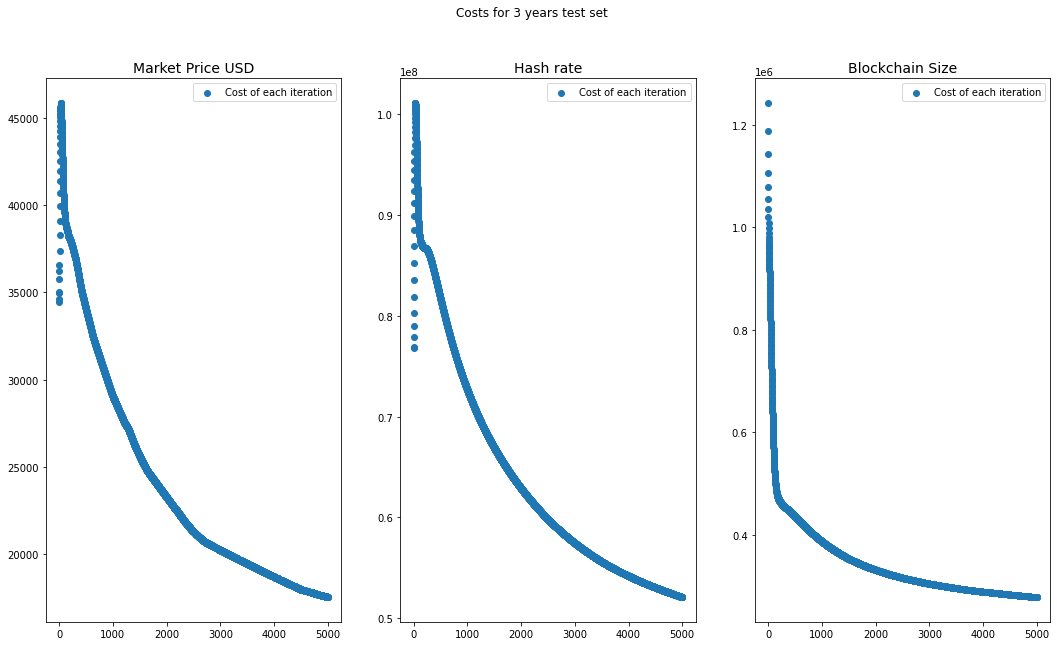

In [44]:
J = [J_marketprice_3y, J_hashrate_3y, J_blockchainsize_3y]

fig, ax = plt.subplots(1, 3, figsize=(18, 10))
fig.suptitle('Costs for 3 years test set')

for idx, j, column_name in zip([0, 1, 2], J, column_names):
    ax[idx].scatter(x=list(range(0, 5000)), y=j, label="Cost of each iteration")
    ax[idx].set_title(column_name, fontsize=14)
    ax[idx].legend()

plt.show()

## Conclusions
The prediction for 30 days ahead is quite close to real data, it is only slightly lower (about 5k USD).

Looking at the predictions for 3 years ahead, we can see that the model shows the "Chinese bubble" in 2019, and the current bull market, but the model expected bitcoin ATH at 25k, when in fact it reached around 64k USD.

# Multivariate single step MLP prediction
Based on Multilayer Perceptron Models for Time Series Forecasting [article](https://machinelearningmastery.com/how-to-develop-multilayer-perceptron-models-for-time-series-forecasting/). 

The goal of this method would be to predict *Market Price USD*, *Hash rate* and *Blockchain Size* based on other parameters, like in previous model.

[$x_{1}$, $x_{2}$...$x_{12}$] -> [$x_{price}$, $x_{hash}$, $x_{blockchain}$] 

In [45]:
df = btc_data.copy()

# Split data into X, y
columns = ["Market Price USD", "Hash rate", "Blockchain Size"]
X = df.drop(columns=columns).to_numpy()
y = df.filter(items=columns).to_numpy()

X_size = X.shape[1]
y_size = y.shape[1]

# Data normalization
X_normalization = np.max(X, axis=0)
y_normalization = np.max(y, axis=0)
X = X/X_normalization
y = y/y_normalization

# Set test data as N last days (there is one record per day)
N = 30
X, X_test = X[:-N], X[-N:]
y, y_test = y[:-N], y[-N:]

# Split training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

print(f'X train: {X_train.shape}\ny train: {y_train.shape}')
print(f'X val: {X_val.shape}\ny val: {y_val.shape}')
print(f'X test: {X_test.shape}\ny test: {y_test.shape}')

X train: (4064, 11)
y train: (4064, 3)
X val: (452, 11)
y val: (452, 3)
X test: (30, 11)
y test: (30, 3)


In [46]:
N = 1095
X_3y, X_test_3y = X[:-N], X[-N:]
y_3y, y_test_3y = y[:-N], y[-N:]

# Split training and validation datasets
X_train_3y, X_val_3y, y_train_3y, y_val_3y = train_test_split(X_3y, y_3y, test_size=0.1, random_state=42)

print(f'X train: {X_train_3y.shape}\ny train: {y_train_3y.shape}')
print(f'X val: {X_val_3y.shape}\ny val: {y_val_3y.shape}')
print(f'X test: {X_test_3y.shape}\ny test: {y_test_3y.shape}')

X train: (3078, 11)
y train: (3078, 3)
X val: (343, 11)
y val: (343, 3)
X test: (1095, 11)
y test: (1095, 3)


In [47]:
model1 = Sequential()
model1.add(Dense(512, activation='relu', input_dim=X_size))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(y_size))
model1.compile(optimizer='adam', loss='mse')
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               6144      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 22,659
Trainable params: 22,659
Non-trainable params: 0
_________________________________________________________________


In [48]:
history1 = model1.fit(
    X_train,
    y_train,
    batch_size = 32,
    epochs=200,
    validation_data=(X_val, y_val),
)

Epoch 1/200
127/127 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 6.8134e-04
Epoch 2/200
127/127 [==============================] - 0s 1ms/step - loss: 5.7304e-04 - val_loss: 5.5824e-04
Epoch 3/200
127/127 [==============================] - 0s 1ms/step - loss: 5.3582e-04 - val_loss: 4.2989e-04
Epoch 4/200
127/127 [==============================] - 0s 1ms/step - loss: 4.7328e-04 - val_loss: 5.4674e-04
Epoch 5/200
127/127 [==============================] - 0s 1ms/step - loss: 4.1352e-04 - val_loss: 3.5026e-04
Epoch 6/200
127/127 [==============================] - 0s 1ms/step - loss: 4.2249e-04 - val_loss: 4.2476e-04
Epoch 7/200
127/127 [==============================] - 0s 1ms/step - loss: 3.8616e-04 - val_loss: 3.8129e-04
Epoch 8/200
127/127 [==============================] - 0s 1ms/step - loss: 3.5474e-04 - val_loss: 3.5870e-04
Epoch 9/200
127/127 [==============================] - 0s 1ms/step - loss: 4.6573e-04 - val_loss: 3.8280e-04
Epoch 10/200
127/127 [=

127/127 [==============================] - 0s 1ms/step - loss: 2.3113e-04 - val_loss: 2.8832e-04
Epoch 148/200
127/127 [==============================] - 0s 1ms/step - loss: 2.1819e-04 - val_loss: 2.3034e-04
Epoch 149/200
127/127 [==============================] - 0s 1ms/step - loss: 2.2901e-04 - val_loss: 2.2888e-04
Epoch 150/200
127/127 [==============================] - 0s 1ms/step - loss: 2.2940e-04 - val_loss: 2.3038e-04
Epoch 151/200
127/127 [==============================] - 0s 1ms/step - loss: 2.0462e-04 - val_loss: 2.1174e-04
Epoch 152/200
127/127 [==============================] - 0s 1ms/step - loss: 2.2353e-04 - val_loss: 2.1342e-04
Epoch 153/200
127/127 [==============================] - 0s 1ms/step - loss: 2.0582e-04 - val_loss: 2.4523e-04
Epoch 154/200
127/127 [==============================] - 0s 1ms/step - loss: 2.3071e-04 - val_loss: 3.4442e-04
Epoch 155/200
127/127 [==============================] - 0s 1ms/step - loss: 2.3068e-04 - val_loss: 2.4393e-04
Epoch 156/200
1

In [49]:
history1_3y = model1.fit(
    X_train_3y,
    y_train_3y,
    batch_size = 32,
    epochs=200,
    validation_data=(X_val_3y, y_val_3y),
)

Epoch 1/200
97/97 [==============================] - 0s 2ms/step - loss: 1.0755e-05 - val_loss: 9.9780e-06
Epoch 2/200
97/97 [==============================] - 0s 2ms/step - loss: 7.8541e-06 - val_loss: 9.0684e-06
Epoch 3/200
97/97 [==============================] - 0s 2ms/step - loss: 7.6823e-06 - val_loss: 9.6073e-06
Epoch 4/200
97/97 [==============================] - 0s 2ms/step - loss: 7.1533e-06 - val_loss: 8.0562e-06
Epoch 5/200
97/97 [==============================] - 0s 2ms/step - loss: 7.0287e-06 - val_loss: 9.3842e-06
Epoch 6/200
97/97 [==============================] - 0s 2ms/step - loss: 6.6614e-06 - val_loss: 8.5567e-06
Epoch 7/200
97/97 [==============================] - 0s 2ms/step - loss: 6.7654e-06 - val_loss: 8.9986e-06
Epoch 8/200
97/97 [==============================] - 0s 2ms/step - loss: 6.4436e-06 - val_loss: 8.9009e-06
Epoch 9/200
97/97 [==============================] - 0s 2ms/step - loss: 6.9817e-06 - val_loss: 8.4668e-06
Epoch 10/200
97/97 [=================

97/97 [==============================] - 0s 2ms/step - loss: 5.8755e-06 - val_loss: 7.7392e-06
Epoch 152/200
97/97 [==============================] - 0s 2ms/step - loss: 5.2106e-06 - val_loss: 8.7317e-06
Epoch 153/200
97/97 [==============================] - 0s 2ms/step - loss: 5.8468e-06 - val_loss: 9.1049e-06
Epoch 154/200
97/97 [==============================] - 0s 2ms/step - loss: 5.6408e-06 - val_loss: 8.3984e-06
Epoch 155/200
97/97 [==============================] - 0s 2ms/step - loss: 5.6130e-06 - val_loss: 8.9819e-06
Epoch 156/200
97/97 [==============================] - 0s 2ms/step - loss: 5.7926e-06 - val_loss: 7.0733e-06
Epoch 157/200
97/97 [==============================] - 0s 2ms/step - loss: 6.1986e-06 - val_loss: 1.0118e-05
Epoch 158/200
97/97 [==============================] - 0s 2ms/step - loss: 5.7294e-06 - val_loss: 7.4817e-06
Epoch 159/200
97/97 [==============================] - 0s 2ms/step - loss: 6.8341e-06 - val_loss: 7.7984e-06
Epoch 160/200
97/97 [============

In [54]:
y_hat = model1.predict(X_test, verbose=0)
y_hat_3y = model1.predict(X_test_3y, verbose=0)

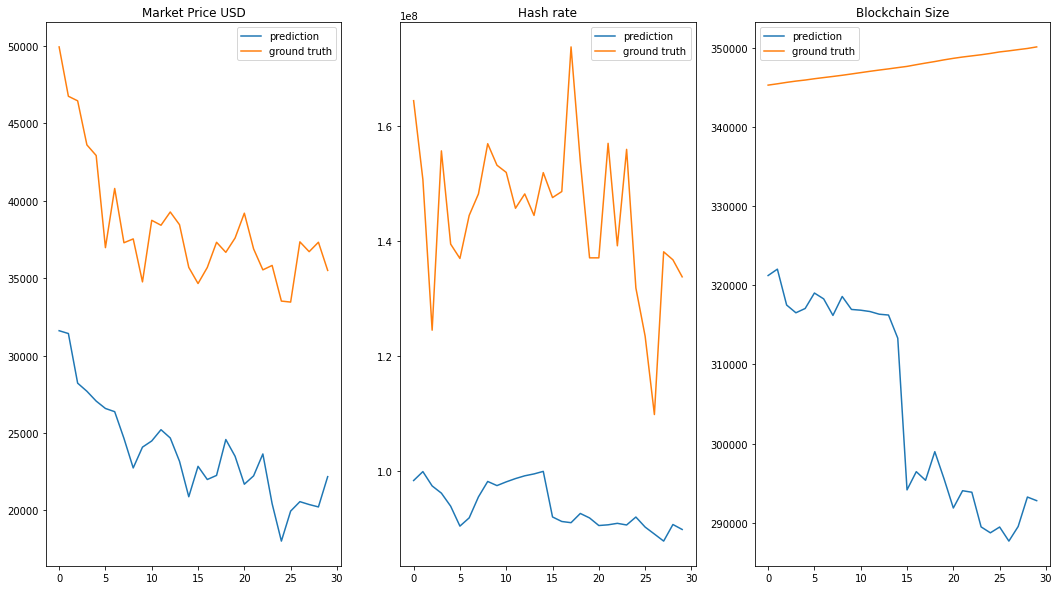

In [55]:
y_hat_p = (y_hat * y_normalization).swapaxes(0,1)
y_test_p = (y_test * y_normalization).swapaxes(0,1) 

fig, axs = plt.subplots(1,y_size, figsize=(18, 10))
for idx, (prediction, ground_truth, label) in enumerate(zip(y_hat_p, y_test_p, columns)):
    axs[idx].plot(prediction, label='prediction')
    axs[idx].plot(ground_truth, label='ground truth')
    axs[idx].set_title(label)
    axs[idx].legend()

plt.show()   

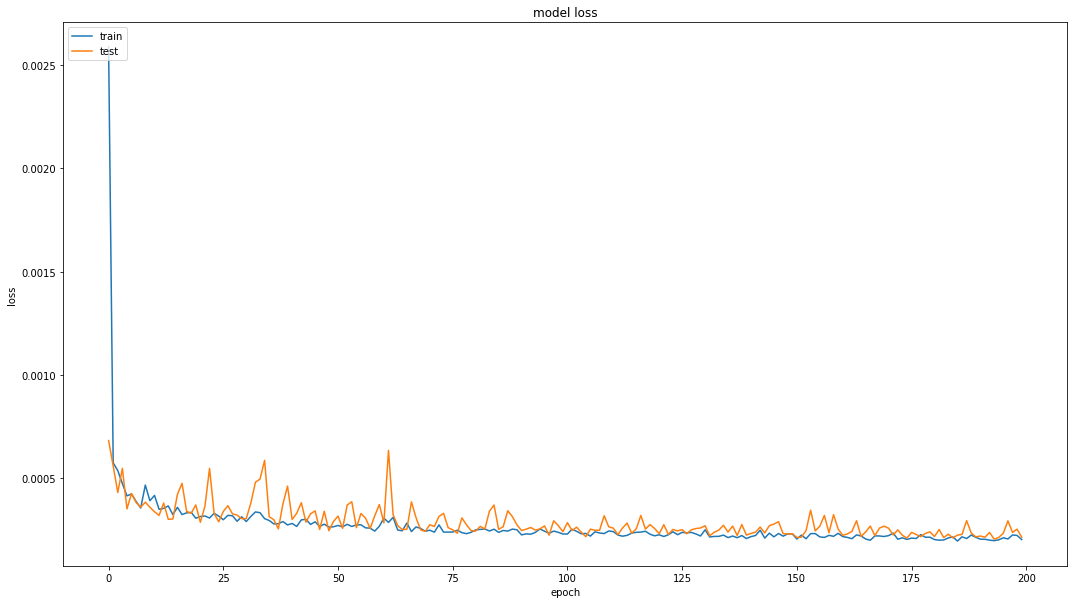

In [52]:
# summarize history for loss
plt.figure(figsize = (18,10))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

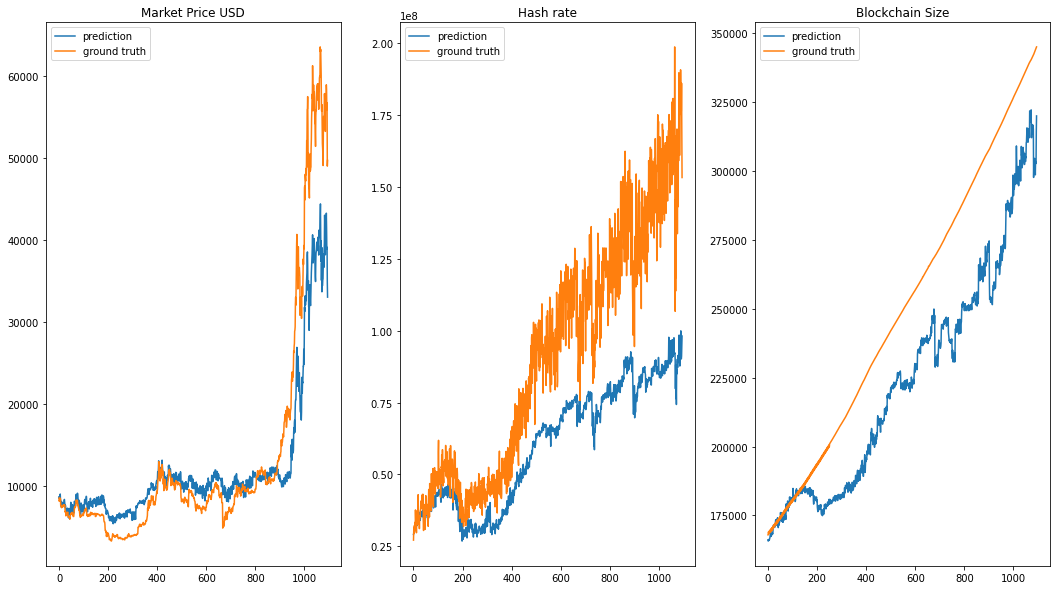

In [56]:
y_hat_p_3y = (y_hat_3y * y_normalization).swapaxes(0,1)
y_test_p_3y = (y_test_3y * y_normalization).swapaxes(0,1) 

fig, axs = plt.subplots(1,y_size, figsize=(18, 10))
for idx, (prediction, ground_truth, label) in enumerate(zip(y_hat_p_3y, y_test_p_3y, columns)):
    axs[idx].plot(prediction, label='prediction')
    axs[idx].plot(ground_truth, label='ground truth')
    axs[idx].set_title(label)
    axs[idx].legend()

plt.show()   

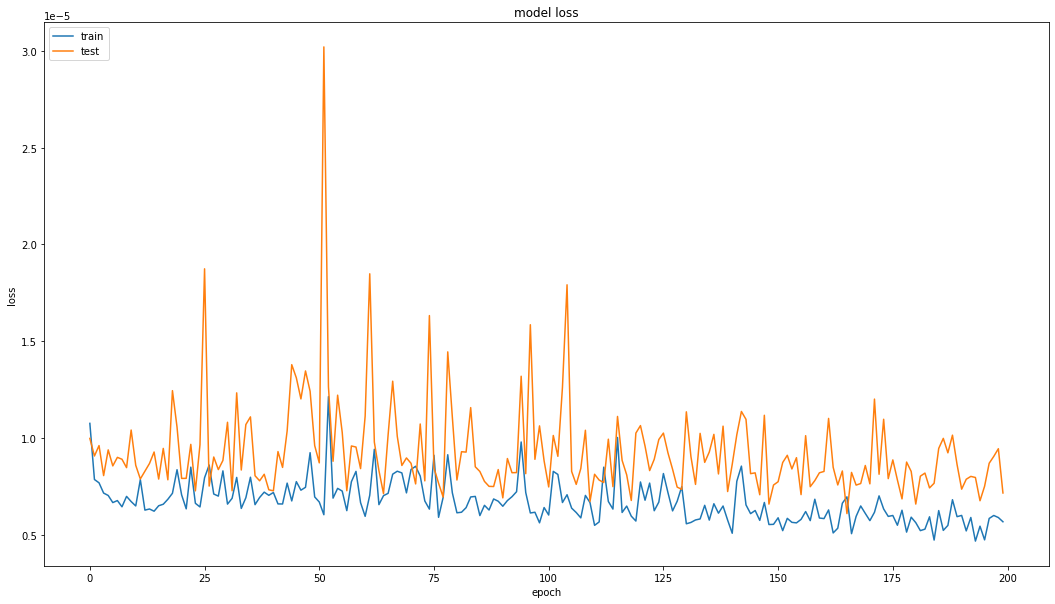

In [57]:
# summarize history for loss
plt.figure(figsize = (18,10))
plt.plot(history1_3y.history['loss'])
plt.plot(history1_3y.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Conclusions
This model did worse (than previous one) with short-term prediction (30 days ahead), it assumed bitcoin would drop down to 20k USD when it actually stopped at around $ 35k.

On the other hand, it coped better with the forecast for 3 years ahead, it priced ATH of the Chinese bubble practically perfectly, and it priced ATH of the current bull market at around 45k USD, so it was 20k USD closer than the previous model.

# Multivariate single step MLP prediction with history
In previous example we have only taken into consideration current values of parameters in order to make prediction. In this section we will try to take N steps back in history and make prediction on that. We will also include in X dataset history of predicting values.

The goal of this method would be to predict *Market Price USD*, *Hash rate* and *Blockchain Size* based on N historical values.

$[X_{1}, X_{2}...X_{N}]$ -> $[x_{price}, x_{hash}, x_{blockchain}]$

where 

$[x_{price}, x_{hash}, x_{blockchain}] \subset X_{N+1}$ and $X_{N} = [x_{1}, x_{2}...x_{15}]$

Helping function that will split dataset to N history packs

In [60]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix], sequences[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [61]:
df = btc_data.copy()

columns = ["Market Price USD", "Hash rate", "Blockchain Size"]
columns_idx = [df.columns.get_loc(c) for c in columns if c in df]

HISTORY_LENGTH = 32
X = df.to_numpy()
print(f'Dataset shape: {X.shape}')

# Data normalization
X_normalization = np.max(X, axis=0)
y_normalization = X_normalization[columns_idx]
X = X/X_normalization

# Split into X and y
X, y = split_sequences(X, HISTORY_LENGTH)
y = y[:,columns_idx]

# flatten input
n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))

X_size = X.shape[1]
y_size = y.shape[1]

# Set test data as N last days (there is one record per day)
N = 30
X, X_test = X[:-N], X[-N:]
y, y_test = y[:-N], y[-N:]
# Split training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

print(f'X train: {X_train.shape}\ny train: {y_train.shape}')
print(f'X val: {X_val.shape}\ny val: {y_val.shape}')
print(f'X test: {X_test.shape}\ny test: {y_test.shape}')

Dataset shape: (4546, 14)
X train: (4035, 448)
y train: (4035, 3)
X val: (449, 448)
y val: (449, 3)
X test: (30, 448)
y test: (30, 3)


In [63]:
N = 1095
X_3y, X_test_3y = X[:-N], X[-N:]
y_3y, y_test_3y = y[:-N], y[-N:]

# Split training and validation datasets
X_train_3y, X_val_3y, y_train_3y, y_val_3y = train_test_split(X_3y, y_3y, test_size=0.1, random_state=42)

print(f'X train: {X_train_3y.shape}\ny train: {y_train_3y.shape}')
print(f'X val: {X_val_3y.shape}\ny val: {y_val_3y.shape}')
print(f'X test: {X_test_3y.shape}\ny test: {y_test_3y.shape}')

X train: (3050, 448)
y train: (3050, 3)
X val: (339, 448)
y val: (339, 3)
X test: (1095, 448)
y test: (1095, 3)


In [62]:
model2 = Sequential()
model2.add(Dense(1024, activation='relu', input_dim=n_input))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(y_size))
model2.compile(optimizer='adam', loss='mse')
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              459776    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 387       
Total params: 591,363
Trainable params: 591,363
Non-trainable params: 0
_________________________________________________________________


In [64]:
history2 = model2.fit(
    X_train,
    y_train,
    batch_size = 32,
    epochs=100,
    validation_data=(X_val, y_val),
)

Epoch 1/100
127/127 [==============================] - 0s 2ms/step - loss: 0.0195 - val_loss: 0.0013
Epoch 2/100
127/127 [==============================] - 0s 2ms/step - loss: 7.3446e-04 - val_loss: 5.2822e-04
Epoch 3/100
127/127 [==============================] - 0s 2ms/step - loss: 5.1142e-04 - val_loss: 3.8732e-04
Epoch 4/100
127/127 [==============================] - 0s 2ms/step - loss: 6.9754e-04 - val_loss: 5.2194e-04
Epoch 5/100
127/127 [==============================] - 0s 2ms/step - loss: 4.7635e-04 - val_loss: 3.6626e-04
Epoch 6/100
127/127 [==============================] - 0s 2ms/step - loss: 4.1357e-04 - val_loss: 0.0016
Epoch 7/100
127/127 [==============================] - 0s 2ms/step - loss: 4.5002e-04 - val_loss: 4.0223e-04
Epoch 8/100
127/127 [==============================] - 0s 2ms/step - loss: 4.8930e-04 - val_loss: 6.2818e-04
Epoch 9/100
127/127 [==============================] - 0s 2ms/step - loss: 5.2200e-04 - val_loss: 2.4722e-04
Epoch 10/100
127/127 [=========

In [65]:
history2_3y = model2.fit(
    X_train_3y,
    y_train_3y,
    batch_size = 32,
    epochs=100,
    validation_data=(X_val_3y, y_val_3y),
)

Epoch 1/100
96/96 [==============================] - 0s 2ms/step - loss: 1.0982e-05 - val_loss: 6.5672e-06
Epoch 2/100
96/96 [==============================] - 0s 2ms/step - loss: 7.6325e-06 - val_loss: 5.4881e-06
Epoch 3/100
96/96 [==============================] - 0s 2ms/step - loss: 7.3511e-06 - val_loss: 6.6164e-06
Epoch 4/100
96/96 [==============================] - 0s 2ms/step - loss: 6.8490e-06 - val_loss: 6.1670e-06
Epoch 5/100
96/96 [==============================] - 0s 2ms/step - loss: 7.5823e-06 - val_loss: 6.9290e-06
Epoch 6/100
96/96 [==============================] - 0s 2ms/step - loss: 7.2522e-06 - val_loss: 6.6297e-06
Epoch 7/100
96/96 [==============================] - 0s 2ms/step - loss: 7.5030e-06 - val_loss: 6.1149e-06
Epoch 8/100
96/96 [==============================] - 0s 2ms/step - loss: 7.3503e-06 - val_loss: 5.6524e-06
Epoch 9/100
96/96 [==============================] - 0s 2ms/step - loss: 1.0530e-05 - val_loss: 7.1678e-06
Epoch 10/100
96/96 [=================

Epoch 77/100
96/96 [==============================] - 0s 2ms/step - loss: 8.0898e-06 - val_loss: 1.2141e-05
Epoch 78/100
96/96 [==============================] - 0s 2ms/step - loss: 9.2051e-06 - val_loss: 2.7612e-05
Epoch 79/100
96/96 [==============================] - 0s 2ms/step - loss: 8.9188e-06 - val_loss: 6.8918e-06
Epoch 80/100
96/96 [==============================] - 0s 2ms/step - loss: 7.1382e-06 - val_loss: 1.1066e-05
Epoch 81/100
96/96 [==============================] - 0s 2ms/step - loss: 6.5122e-06 - val_loss: 5.7934e-06
Epoch 82/100
96/96 [==============================] - 0s 2ms/step - loss: 7.7437e-06 - val_loss: 6.8312e-06
Epoch 83/100
96/96 [==============================] - 0s 2ms/step - loss: 6.3723e-06 - val_loss: 1.1693e-05
Epoch 84/100
96/96 [==============================] - 0s 2ms/step - loss: 9.7647e-06 - val_loss: 6.4783e-06
Epoch 85/100
96/96 [==============================] - 0s 2ms/step - loss: 9.4273e-06 - val_loss: 6.1942e-06
Epoch 86/100
96/96 [========

In [66]:
y_hat = model2.predict(X_test, verbose=0)
y_hat_3y = model2.predict(X_test_3y, verbose=0)

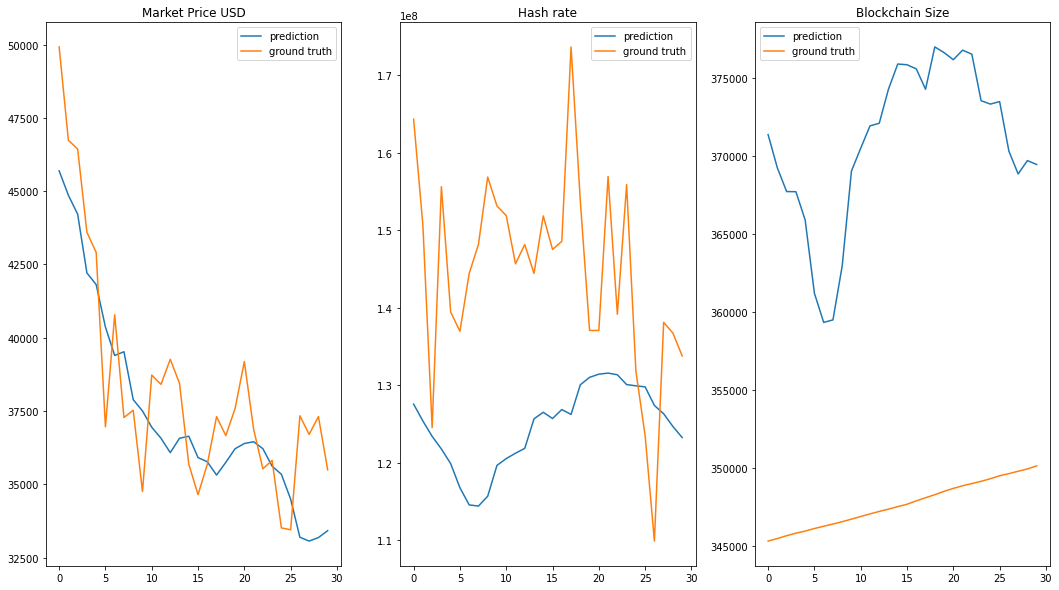

In [67]:
y_hat_p = (y_hat * y_normalization).swapaxes(0,1)
y_test_p = (y_test * y_normalization).swapaxes(0,1) 

fig, axs = plt.subplots(1,y_size, figsize=(18, 10))
for idx, (prediction, ground_truth, label) in enumerate(zip(y_hat_p, y_test_p, columns)):
    axs[idx].plot(prediction, label='prediction')
    axs[idx].plot(ground_truth, label='ground truth')
    axs[idx].set_title(label)
    axs[idx].legend()

plt.show()  

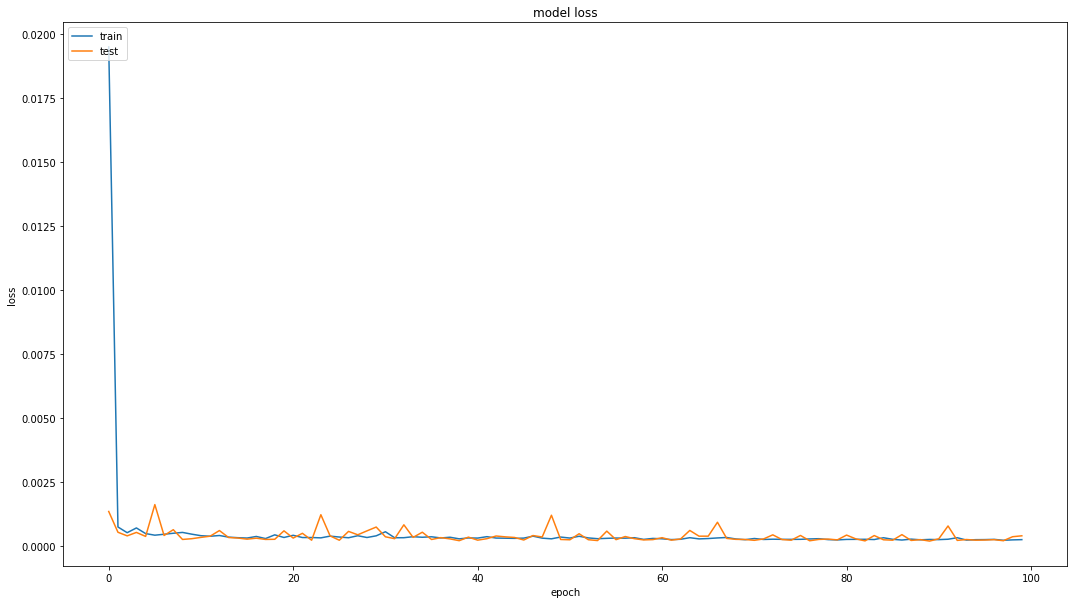

In [68]:
# summarize history for loss
plt.figure(figsize = (18,10))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

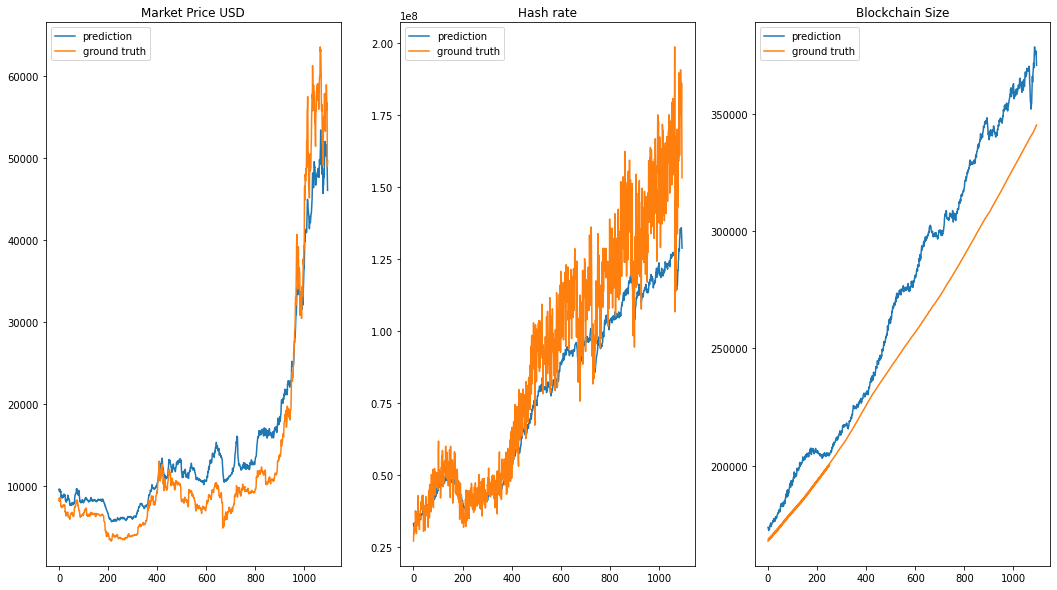

In [69]:
y_hat_p_3y = (y_hat_3y * y_normalization).swapaxes(0,1)
y_test_p_3y = (y_test_3y * y_normalization).swapaxes(0,1) 

fig, axs = plt.subplots(1,y_size, figsize=(18, 10))
for idx, (prediction, ground_truth, label) in enumerate(zip(y_hat_p_3y, y_test_p_3y, columns)):
    axs[idx].plot(prediction, label='prediction')
    axs[idx].plot(ground_truth, label='ground truth')
    axs[idx].set_title(label)
    axs[idx].legend()

plt.show()  

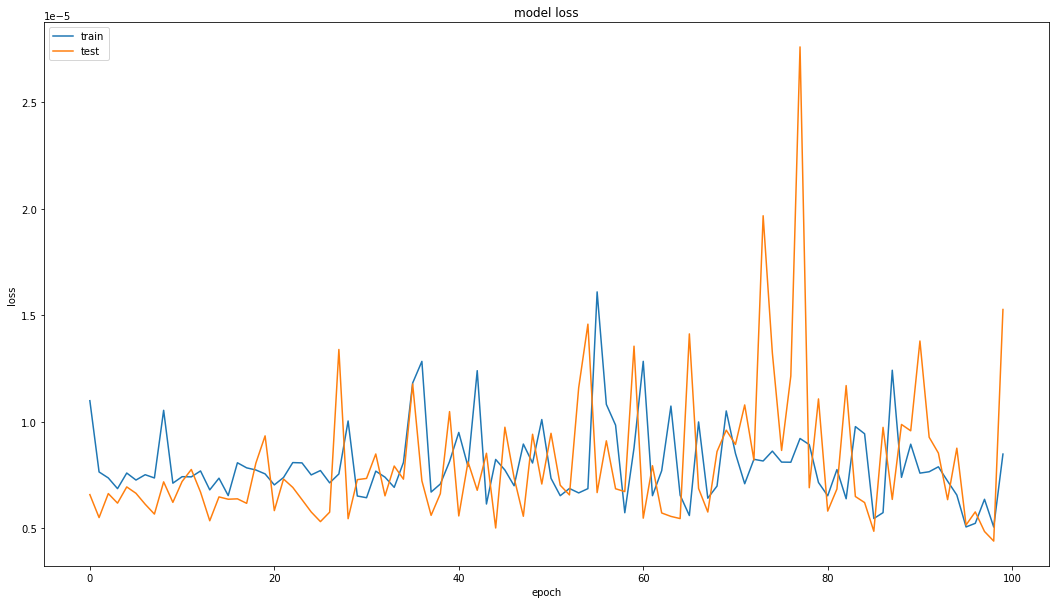

In [70]:
# summarize history for loss
plt.figure(figsize = (18,10))
plt.plot(history2_3y.history['loss'])
plt.plot(history2_3y.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Conclusions
The model that also used historical data for prediction did better than the previous ones. He priced btc with a deviation of about 4k USD in the 30-day ahead prediction.

For 3 years ahead predictions, model overestimated prices from the Chinese Bubble in 2019 (model predicted ATH at 17k USD, when in fact it was 12.5k USD). However, it has quite accurately defined the current ATH at around 53k USD (instead of $ 63k).

# Multivariate multi step MLP prediction with history
Final evolution of this method will be adding prediction for K steps in the future.

The goal of this method would be to predict K days for *Market Price USD*, *Hash rate* and *Blockchain Size* based on N historical values.

$[X_{1}, X_{2}...X_{N}]$ -> $[X_{N+1}, X_{N+2}...X_{N+K}]$

where 

$[x_{price}, x_{hash}, x_{blockchain}] \subset X_{N+1}$ and $X_{N} = [x_{1}, x_{2}...x_{15}]$

In [72]:
def split_sequences_multi(sequences, n_history, n_pred):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_history + n_pred
        # check if we are beyond the dataset
        if end_ix > len(sequences) - 1:
            break
        # gather input and output parts of the pattern
        end_hist = i + n_history
        end_pred = end_hist + n_pred
        seq_x, seq_y = sequences[i:end_hist], sequences[end_hist:end_pred]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [73]:
df = btc_data.copy()

columns = ["Market Price USD", "Hash rate", "Blockchain Size"]
columns_idx = [df.columns.get_loc(c) for c in columns if c in df]

HISTORY_LENGTH = 32
PREDICTION_LENGTH = 8
X = df.to_numpy()
print(f'Dataset shape: {X.shape}')

# Data normalization
X_normalization = np.max(X, axis=0)
y_normalization = X_normalization[columns_idx]
X = X/X_normalization

# Split into X and y
X, y = split_sequences_multi(X, HISTORY_LENGTH, PREDICTION_LENGTH)
y = y[:,:,columns_idx]

# flatten input
n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))

# flatten output
n_output = y.shape[1] * y.shape[2]
y = y.reshape((X.shape[0], n_output))

X_size = X.shape[1]
y_size = y.shape[1]

# Set test data as N last days (there is one record per day)
N = 30
X, X_test = X[:-N], X[-N:]
y, y_test = y[:-N], y[-N:]

# Split training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

print(f'X train: {X_train.shape}\ny train: {y_train.shape}')
print(f'X val: {X_val.shape}\ny val: {y_val.shape}')
print(f'X test: {X_test.shape}\ny test: {y_test.shape}')

Dataset shape: (4546, 14)
X train: (4028, 448)
y train: (4028, 24)
X val: (448, 448)
y val: (448, 24)
X test: (30, 448)
y test: (30, 24)


In [74]:
N = 1095
X_3y, X_test_3y = X[:-N], X[-N:]
y_3y, y_test_3y = y[:-N], y[-N:]

# Split training and validation datasets
X_train_3y, X_val_3y, y_train_3y, y_val_3y = train_test_split(X_3y, y_3y, test_size=0.1, random_state=42)

print(f'X train: {X_train_3y.shape}\ny train: {y_train_3y.shape}')
print(f'X val: {X_val_3y.shape}\ny val: {y_val_3y.shape}')
print(f'X test: {X_test_3y.shape}\ny test: {y_test_3y.shape}')

X train: (3042, 448)
y train: (3042, 24)
X val: (339, 448)
y val: (339, 24)
X test: (1095, 448)
y test: (1095, 24)


In [75]:
model3 = Sequential()
model3.add(Dense(1024, activation='relu', input_dim=n_input))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(n_output))
model3.compile(optimizer='adam', loss='mse')
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1024)              459776    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_8 (Dense)              (None, 24)                6168      
Total params: 728,344
Trainable params: 728,344
Non-trainable params: 0
_________________________________________________________________


In [76]:
history3 = model3.fit(
    X_train,
    y_train,
    batch_size = 32,
    epochs=100,
    validation_data=(X_val, y_val),
)

Epoch 1/100
126/126 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 7.9699e-04
Epoch 2/100
126/126 [==============================] - 0s 2ms/step - loss: 7.0484e-04 - val_loss: 8.6601e-04
Epoch 3/100
126/126 [==============================] - 0s 2ms/step - loss: 7.2501e-04 - val_loss: 6.7589e-04
Epoch 4/100
126/126 [==============================] - 0s 2ms/step - loss: 5.4018e-04 - val_loss: 4.7429e-04
Epoch 5/100
126/126 [==============================] - 0s 2ms/step - loss: 5.5374e-04 - val_loss: 6.8236e-04
Epoch 6/100
126/126 [==============================] - 0s 2ms/step - loss: 4.4792e-04 - val_loss: 4.8669e-04
Epoch 7/100
126/126 [==============================] - 0s 2ms/step - loss: 4.7850e-04 - val_loss: 4.2602e-04
Epoch 8/100
126/126 [==============================] - 0s 2ms/step - loss: 4.3588e-04 - val_loss: 5.4375e-04
Epoch 9/100
126/126 [==============================] - 0s 2ms/step - loss: 4.4903e-04 - val_loss: 4.1904e-04
Epoch 10/100
126/126 [=

In [77]:
history3_3y = model3.fit(
    X_train_3y,
    y_train_3y,
    batch_size = 32,
    epochs=100,
    validation_data=(X_val_3y, y_val_3y),
)

Epoch 1/100
96/96 [==============================] - 0s 3ms/step - loss: 1.1292e-05 - val_loss: 8.3333e-06
Epoch 2/100
96/96 [==============================] - 0s 2ms/step - loss: 9.1293e-06 - val_loss: 1.0556e-05
Epoch 3/100
96/96 [==============================] - 0s 2ms/step - loss: 9.1769e-06 - val_loss: 9.1639e-06
Epoch 4/100
96/96 [==============================] - 0s 2ms/step - loss: 8.5765e-06 - val_loss: 8.5827e-06
Epoch 5/100
96/96 [==============================] - 0s 2ms/step - loss: 8.6853e-06 - val_loss: 8.3436e-06
Epoch 6/100
96/96 [==============================] - 0s 2ms/step - loss: 8.4951e-06 - val_loss: 8.5379e-06
Epoch 7/100
96/96 [==============================] - 0s 2ms/step - loss: 9.5581e-06 - val_loss: 1.0749e-05
Epoch 8/100
96/96 [==============================] - 0s 2ms/step - loss: 8.6503e-06 - val_loss: 8.4155e-06
Epoch 9/100
96/96 [==============================] - 0s 2ms/step - loss: 8.4423e-06 - val_loss: 9.6751e-06
Epoch 10/100
96/96 [=================

Epoch 77/100
96/96 [==============================] - 0s 2ms/step - loss: 8.3264e-06 - val_loss: 1.4243e-05
Epoch 78/100
96/96 [==============================] - 0s 2ms/step - loss: 9.0879e-06 - val_loss: 1.4126e-05
Epoch 79/100
96/96 [==============================] - 0s 2ms/step - loss: 8.0498e-06 - val_loss: 8.0558e-06
Epoch 80/100
96/96 [==============================] - 0s 2ms/step - loss: 6.9451e-06 - val_loss: 9.9227e-06
Epoch 81/100
96/96 [==============================] - 0s 2ms/step - loss: 7.2714e-06 - val_loss: 1.2509e-05
Epoch 82/100
96/96 [==============================] - 0s 2ms/step - loss: 7.8874e-06 - val_loss: 1.2544e-05
Epoch 83/100
96/96 [==============================] - 0s 2ms/step - loss: 8.2566e-06 - val_loss: 3.9046e-05
Epoch 84/100
96/96 [==============================] - 0s 2ms/step - loss: 1.7590e-05 - val_loss: 9.6946e-06
Epoch 85/100
96/96 [==============================] - 0s 2ms/step - loss: 8.9870e-06 - val_loss: 9.2251e-06
Epoch 86/100
96/96 [========

In [79]:
y_hat = model3.predict(X_test, verbose=0)
y_hat.reshape(-1, PREDICTION_LENGTH, len(columns)).shape
y_hat_3y = model3.predict(X_test_3y, verbose=0)
y_hat_3y.reshape(-1, PREDICTION_LENGTH, len(columns)).shape

(1095, 8, 3)

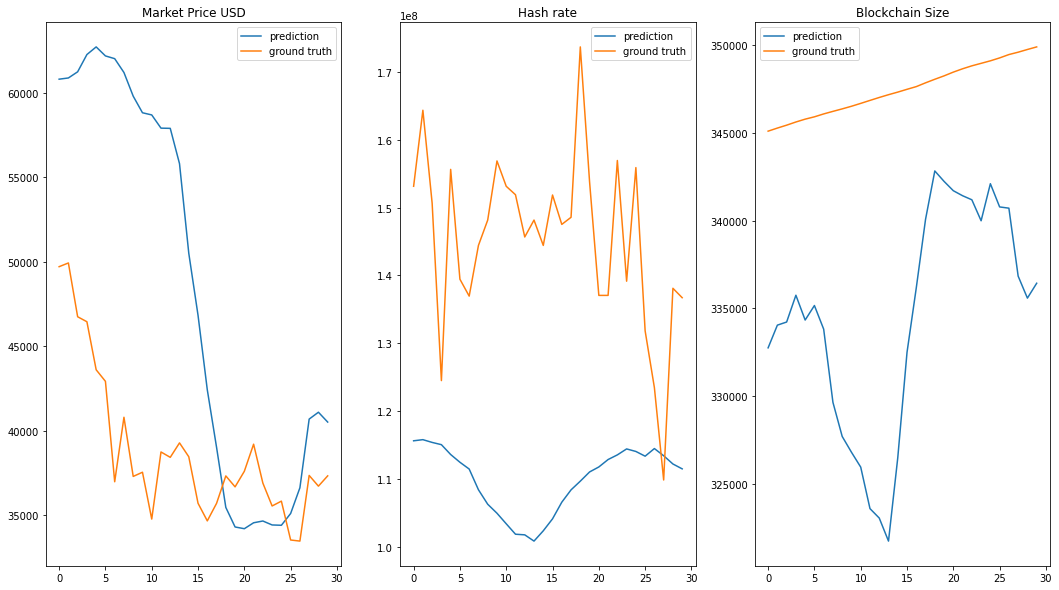

In [81]:
PREDICICTION_DAY = 7

y1 = y_hat.reshape(-1, PREDICTION_LENGTH, len(columns))
y2 = y_test.reshape(-1, PREDICTION_LENGTH, len(columns))

y_hat_p = (y1[:,PREDICICTION_DAY] * y_normalization).swapaxes(0,1)
y_test_p = (y2[:,PREDICICTION_DAY] * y_normalization).swapaxes(0,1)

fig, axs = plt.subplots(1,len(columns), figsize=(18, 10))
for idx, (prediction, ground_truth, label) in enumerate(zip(y_hat_p, y_test_p, columns)):
    axs[idx].plot(prediction, label='prediction')
    axs[idx].plot(ground_truth, label='ground truth')
    axs[idx].set_title(label)
    axs[idx].legend()

plt.show()  

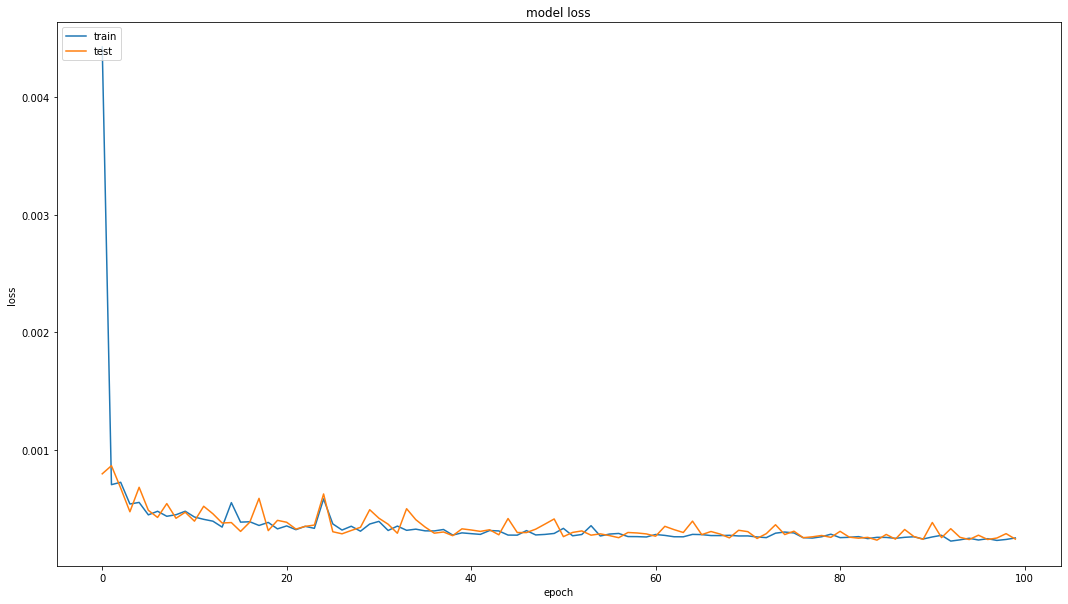

In [82]:
# summarize history for loss
plt.figure(figsize = (18,10))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

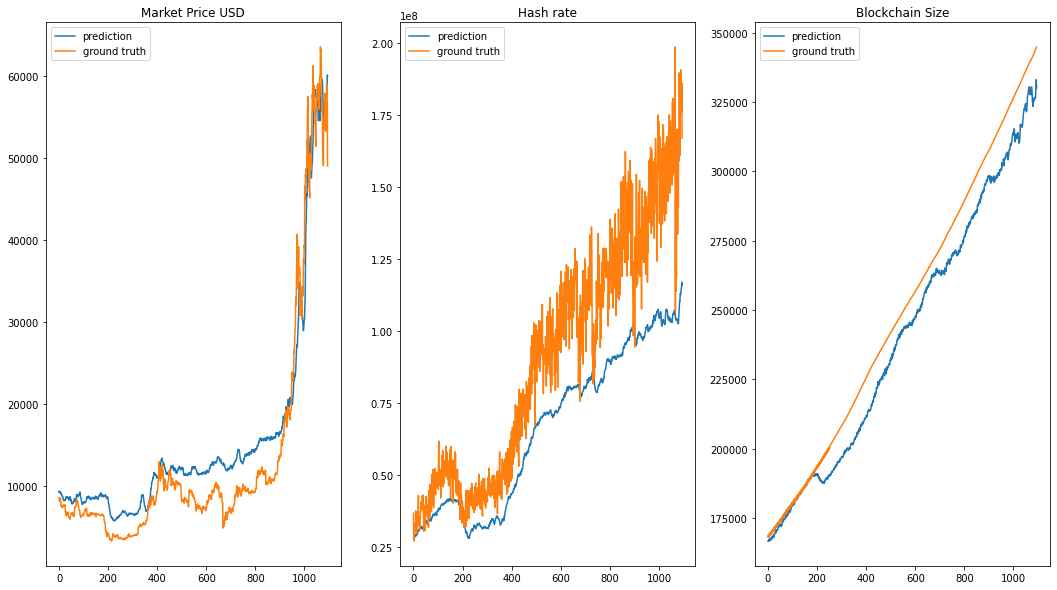

In [83]:
PREDICICTION_DAY = 7

y1_3y = y_hat_3y.reshape(-1, PREDICTION_LENGTH, len(columns))
y2_3y = y_test_3y.reshape(-1, PREDICTION_LENGTH, len(columns))

y_hat_p_3y = (y1_3y[:,PREDICICTION_DAY] * y_normalization).swapaxes(0,1)
y_test_p_3y = (y2_3y[:,PREDICICTION_DAY] * y_normalization).swapaxes(0,1)

fig, axs = plt.subplots(1,len(columns), figsize=(18, 10))
for idx, (prediction, ground_truth, label) in enumerate(zip(y_hat_p_3y, y_test_p_3y, columns)):
    axs[idx].plot(prediction, label='prediction')
    axs[idx].plot(ground_truth, label='ground truth')
    axs[idx].set_title(label)
    axs[idx].legend()

plt.show()  

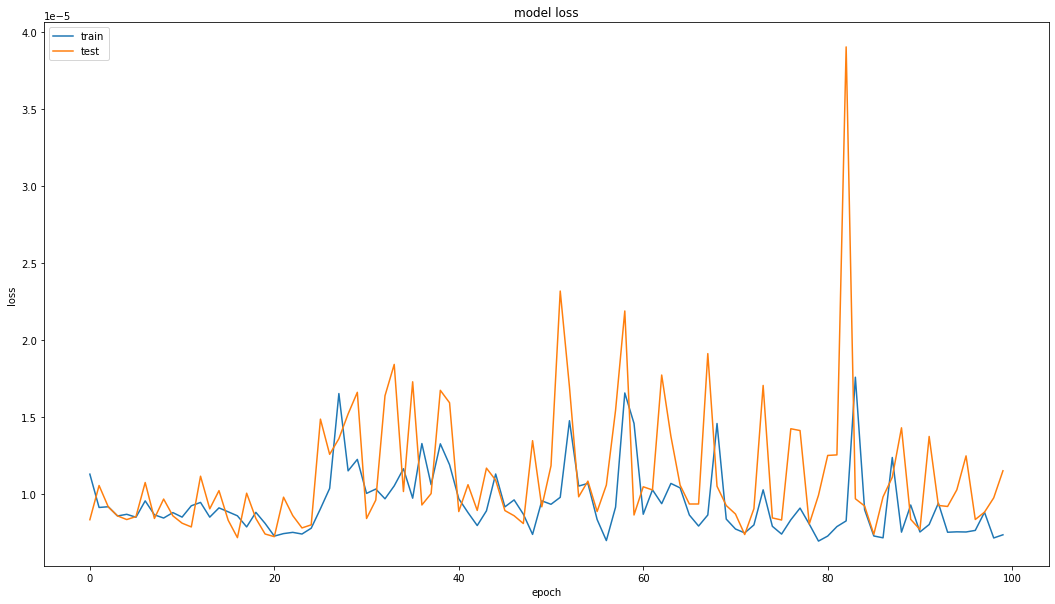

In [84]:
# summarize history for loss
plt.figure(figsize = (18,10))
plt.plot(history3_3y.history['loss'])
plt.plot(history3_3y.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Conclusions
The short-term prediction for this model was quite poor, it predicted a btc crash with a two-week lag, but it well defined the level at which bitcoin's price stopped so far - $ 35k USD.

On the other hand, his long-term predictions (3 years ahead) were by far the best, he accurately predicted the ATH of the boom in 2021, at around 60k USD.

# ARIMA predictions
ARIMA model predictions based only on historical Bitcoin Market Price.

In [87]:
btc_data[btc_data["Market Price USD"]!=0].first_valid_index()
btc_data_ARIMA=btc_data.iloc[591:]
btc_data_ARIMA["Market Price USD stationary"]=btc_data_ARIMA["Market Price USD"]

C:\Users\gasie\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [89]:
#P-Value has to be <0.05 for data to be stationary so that ARIMA can be used
def stationarity_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print(" P-Value : ", dftest[1])

In [90]:
stationarity_test(btc_data_ARIMA["Market Price USD stationary"])

 P-Value :  0.6121432459861968


In [91]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

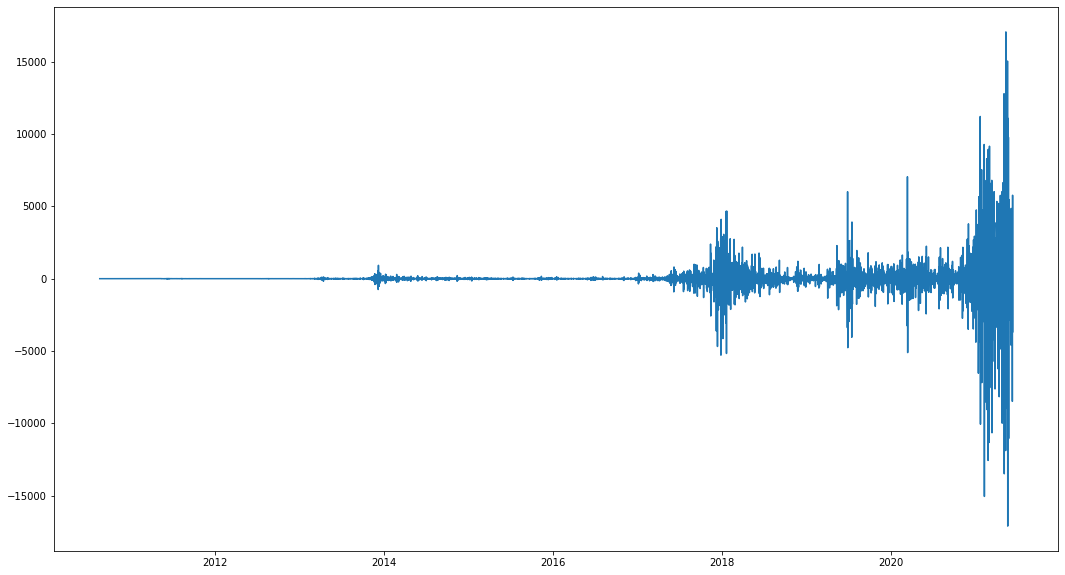

 P-Value :  0.0


In [94]:
temp  = difference(btc_data_ARIMA["Market Price USD stationary"])
btc_data_ARIMA = btc_data_ARIMA.iloc[1:]
btc_data_ARIMA["Market Price USD stationary"]=temp
btc_data_ARIMA.dropna(how='any', inplace=True)
plt.figure(figsize = (18,10))
plt.plot(btc_data_ARIMA["Market Price USD stationary"])
plt.show()
stationarity_test(btc_data_ARIMA["Market Price USD stationary"])

In [96]:
test_days=30
train=btc_data_ARIMA.iloc[:-test_days]
test_days=1095
train_3y=btc_data_ARIMA.iloc[:-test_days]

In [102]:
model=ARIMA(train["Market Price USD stationary"],order=(5,1,0))
model=model.fit(transparams=True)
model.summary()

C:\Users\gasie\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\gasie\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D wil

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   ARIMA Model Results                                   
=========================================================================================
Dep. Variable:     D.Market Price USD stationary   No. Observations:                 3921
Model:                            ARIMA(5, 1, 0)   Log Likelihood              -31593.131
Method:                                  css-mle   S.D. of innovations            763.485
Date:                           Tue, 15 Jun 2021   AIC                          63200.262
Time:                                   21:35:20   BIC                          63244.181
Sample:                               08-20-2010   HQIC                         63215.846
                                    - 05-14-2021                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.0634      1.393      0.046      0.964      -2.667       2.793
ar.L1.D.Market Price USD stationary    -1.9682      0.015   -133.041      0.000      -1.997      -1.939
ar.L2.D.Market Price USD stationary    -2.2922      0.030    -77.356      0.000      -2.350      -2.234
ar.L3.D.Market Price USD stationary    -1.9078      0.036    -52.863      0.000      -1.979      -1.837
ar.L4.D.Market Price USD stationary    -1.1608      0.030    -38.951      0.000      -1.219      -1.102
ar.L5.D.Market Price USD stationary    -0.4295      0.015    -28.662      0.000      -0.459      -0.400
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0504           -1.2023j            1.2034           -0.2433
AR.2            0.0504           +1.2023j            1.2034            0.2433
AR.3           -1.1823           -0.0000j            1.1823           -0.5000
AR.4           -0.8105           -0.8384j            1.1661           -0.3723
AR.5           -0.8105           +0.8384j            1.1661            0.3723
-----------------------------------------------------------------------------
"""

In [118]:
model_3y=ARIMA(train_3y["Market Price USD stationary"],order=(7,1,10))
model_3y=model_3y.fit(transparams=True)
model_3y.summary()

C:\Users\gasie\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\gasie\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D wil

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   ARIMA Model Results                                   
=========================================================================================
Dep. Variable:     D.Market Price USD stationary   No. Observations:                 2856
Model:                           ARIMA(7, 1, 10)   Log Likelihood              -18867.530
Method:                                  css-mle   S.D. of innovations                nan
Date:                           Tue, 15 Jun 2021   AIC                          37773.059
Time:                                   21:39:59   BIC                          37886.246
Sample:                               08-20-2010   HQIC                         37813.874
                                    - 06-14-2018                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 1.592e-06   3.84e-06      0.414      0.679   -5.94e-06    9.12e-06
ar.L1.D.Market Price USD stationary     -3.1709      0.000  -8477.430      0.000      -3.172      -3.170
ar.L2.D.Market Price USD stationary     -5.0499      0.003  -1885.248      0.000      -5.055      -5.045
ar.L3.D.Market Price USD stationary     -5.7822      0.004  -1564.660      0.000      -5.789      -5.775
ar.L4.D.Market Price USD stationary     -5.6260      0.001  -5353.257      0.000      -5.628      -5.624
ar.L5.D.Market Price USD stationary     -4.3658        nan        nan        nan         nan         nan
ar.L6.D.Market Price USD stationary     -2.1538        nan        nan        nan         nan         nan
ar.L7.D.Market Price USD stationary     -0.4479      0.000  -3970.400      0.000      -0.448      -0.448
ma.L1.D.Market Price USD stationary      0.3149        nan        nan        nan         nan         nan
ma.L2.D.Market Price USD stationary     -1.4221   2.61e-05  -5.45e+04      0.000      -1.422      -1.422
ma.L3.D.Market Price USD stationary     -1.1425   3.98e-05  -2.87e+04      0.000      -1.143      -1.142
ma.L4.D.Market Price USD stationary      0.2031      5e-05   4061.666      0.000       0.203       0.203
ma.L5.D.Market Price USD stationary     -0.0401   4.83e-05   -831.752      0.000      -0.040      -0.040
ma.L6.D.Market Price USD stationary      0.0819   5.59e-05   1466.020      0.000       0.082       0.082
ma.L7.D.Market Price USD stationary      1.3738   1.44e-05   9.53e+04      0.000       1.374       1.374
ma.L8.D.Market Price USD stationary      0.8933   4.89e-05   1.83e+04      0.000       0.893       0.893
ma.L9.D.Market Price USD stationary     -0.7103   5.61e-05  -1.27e+04      0.000      -0.710      -0.710
ma.L10.D.Market Price USD stationary    -0.5519   3.99e-05  -1.38e+04      0.000      -0.552      -0.552
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.2607           -0.9706j            1.0050           -0.2082
AR.2             0.2607           +0.9706j            1.0050            0.2082
AR.3            -0.7035           -0.7416j            1.0222           -0.3708
AR.4            -0.7035           +0.7416j            1.0222            0.3708
AR.5            -1.0058           -0.3088j            1.0521           -0.4526
AR.6            -1.0058           +0.3088j            1.0521            0.4526
AR.7            -1.9108           -0.0000j            1.9108           -0.5000
MA.1             1.0001           -0.0087j            1.0002        

<AxesSubplot:>

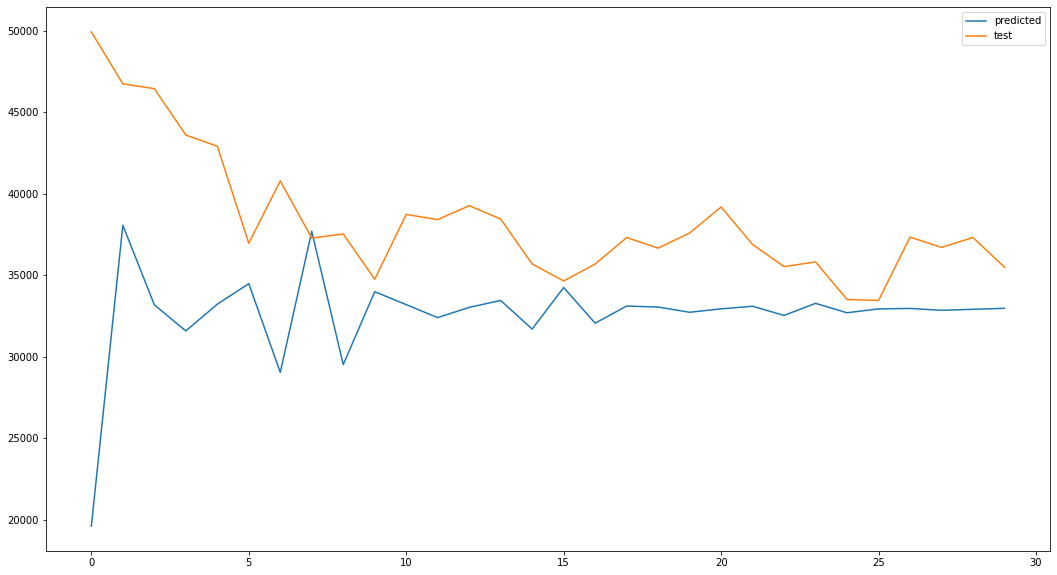

In [108]:
test_days=30
start=len(train)
end=len(train)+test_days-1
pred=model.predict(start=start,end=end).rename('ARIMA Predictions')
start_price=btc_data_ARIMA["Market Price USD"][-31]
predictions=[]
for i in range(len(pred)):
    if i ==0:
        p=start_price+pred[i]
    else:
        p=predictions[-1]+pred[i]
    predictions.append(p)
predictions
plt.figure(figsize = (18,10))
pred = pd.Series(predictions)
test=pd.Series(list(btc_data_ARIMA["Market Price USD"][-test_days:]))
pred.plot(legend=True, label='predicted')
test.plot(legend=True, label= 'test')

<AxesSubplot:>

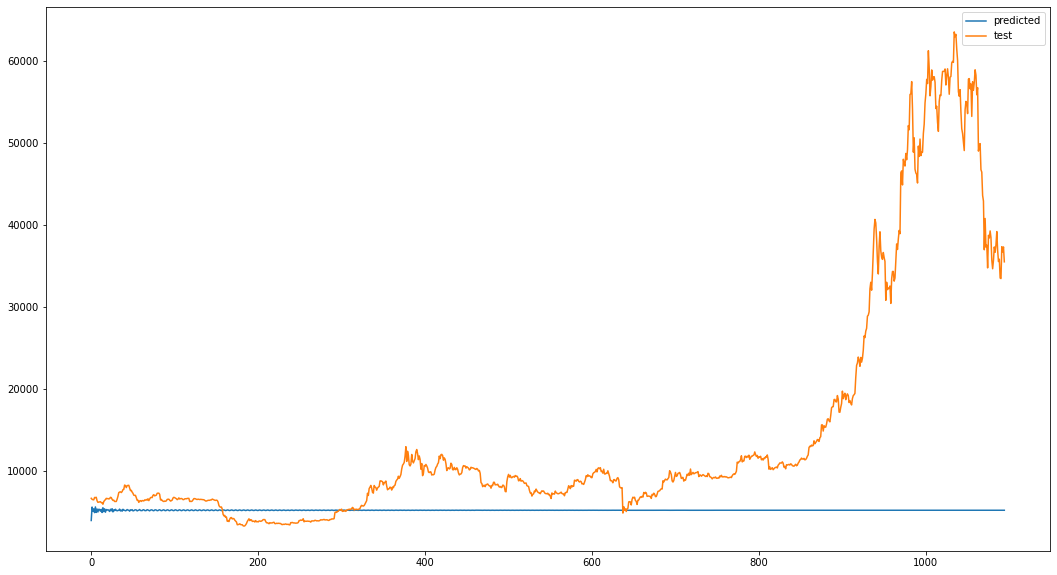

In [119]:
test_days=1095
start=len(train_3y)
end=len(train_3y)+test_days-1
pred=model_3y.predict(start=start,end=end).rename('ARIMA Predictions')
start_price=btc_data_ARIMA["Market Price USD"][-test_days]
predictions=[]
for i in range(len(pred)):
    if i ==0:
        p=start_price+pred[i]
    else:
        p=predictions[-1]+pred[i]
    predictions.append(p)
predictions
plt.figure(figsize = (18,10))
pred = pd.Series(predictions)
test=pd.Series(list(btc_data_ARIMA["Market Price USD"][-test_days:]))
pred.plot(legend=True, label='predicted')
test.plot(legend=True, label= 'test')

## Conclusions
Predictions based only on historical Bitcoin prices were the worst. While the predictions for 30 days ahead are not very different from reality (deviations from 1k to 10k USD), the prediction for 3 years ahead did not work completely.

## Summary
Bitcoin price prediction based on other Blockchain parameters is possible with satisfying accuracy. However, that we do not actually know the value of other parameters in advance, and it can be as difficult to accurately estimate them as to price, so the use of our methods in practice is not fully possible.
Prediction based only on historical prices works only for short periods of time (30days ahead) with medium accuracy.

The best prediction model for the short-term (30 days ahead), was the "Multivariate single step MLP prediction with history" model, as it predicted the level of recent crash well and was on average wrong by no more than 4k USD (about 10%).
In the case of prediction for a longer period of time, the "Multivariate multi step MLP prediction with history" model works best, which determined the ATH of the current bull market with an error of only $ 5k (about 8%).

Predicting Hash Rate and Blockchain size for short periods of time does not work. However, for the 3-year period, the models did quite well, especially 'Multivariate single step MLP prediction with history' and 'Multivariate multi step MLP prediction with history'.